In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression, f_classif, mutual_info_regression, mutual_info_classif, SelectKBest
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error
from sklearn.model_selection import ParameterGrid


/Users/youbinkim/opt/anaconda3/envs/data1030_env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('/Users/youbinkim/Documents/2022_Fall/project/data/Drug_Consumption.csv')
#df = df.drop(['ID', 'Alcohol', 'Amyl','Caff','Choc','Ketamine','Legalh','Nicotine','VSA'], axis=1)
df = df.drop(['ID', 'Alcohol', 'Amyl','Caff','Choc','Ketamine','Legalh','VSA'], axis=1)

## EDA

In [3]:
print (df.head())

     Age Gender                          Education Country Ethnicity   Nscore  \
0  25-34      M                   Doctorate degree      UK     White -0.67825   
1  35-44      M  Professional certificate/ diploma      UK     White -0.46725   
2  18-24      F                     Masters degree      UK     White -0.14882   
3  35-44      F                   Doctorate degree      UK     White  0.73545   
4    65+      F            Left school at 18 years  Canada     White -0.67825   

    Escore   Oscore   Ascore   Cscore  ...  Benzos  Cannabis Coke Crack  \
0  1.93886  1.43533  0.76096 -0.14277  ...     CL0       CL4  CL3   CL0   
1  0.80523 -0.84732 -1.62090 -1.01450  ...     CL0       CL3  CL0   CL0   
2 -0.80615 -0.01928  0.59042  0.58489  ...     CL3       CL2  CL2   CL0   
3 -1.63340 -0.45174 -0.30172  1.30612  ...     CL0       CL3  CL0   CL0   
4 -0.30033 -1.55521  2.03972  1.63088  ...     CL0       CL0  CL0   CL0   

  Ecstasy Heroin  LSD Meth Mushrooms Nicotine  
0     CL4    C

In [4]:
print (df)

        Age Gender                                          Education  \
0     25-34      M                                   Doctorate degree   
1     35-44      M                  Professional certificate/ diploma   
2     18-24      F                                     Masters degree   
3     35-44      F                                   Doctorate degree   
4       65+      F                            Left school at 18 years   
...     ...    ...                                                ...   
1879  18-24      F  Some college or university, no certificate or ...   
1880  18-24      M  Some college or university, no certificate or ...   
1881  25-34      F                                  University degree   
1882  18-24      F  Some college or university, no certificate or ...   
1883  18-24      M  Some college or university, no certificate or ...   

                  Country Ethnicity   Nscore   Escore   Oscore   Ascore  \
0                      UK     White -0.67825  1.

In [5]:
# Check for missing value
df.isna().sum().sum()

0

In [6]:
print (df.dtypes)

Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Amphet        object
Benzos        object
Cannabis      object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
dtype: object


In [7]:
# df_index_never_used = df.set_index('Crack', drop = False)
# print (df_index_never_used.loc['CL0'].head())

In [8]:
edu_data = df["Education"].value_counts()
age_data = df["Age"].value_counts()
gender_data = df["Gender"].value_counts()
country_data = df["Country"].value_counts(normalize=True)

ethnicity_data = df["Ethnicity"].value_counts(normalize=True)

# For bar plot
nscore_data = df["Nscore"].value_counts()
escore_data = df["Escore"].value_counts()
oscore_data = df["Oscore"].value_counts()
ascore_data = df["Ascore"].value_counts()
cscore_data = df["Cscore"].value_counts()
impulsive_data = df["Impulsive"].value_counts()
ss_data = df["SS"].value_counts()
cannabis_data = df["Cannabis"].value_counts()

In [9]:
# pd.plotting.scatter_matrix(df.select_dtypes(object), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
#                            s=30, alpha=.1)
# plt.show()

In [10]:
print (df.shape)

(1884, 23)


In [11]:
save_images_to = '/Users/youbinkim/Documents/2022_Fall/project/figures/'

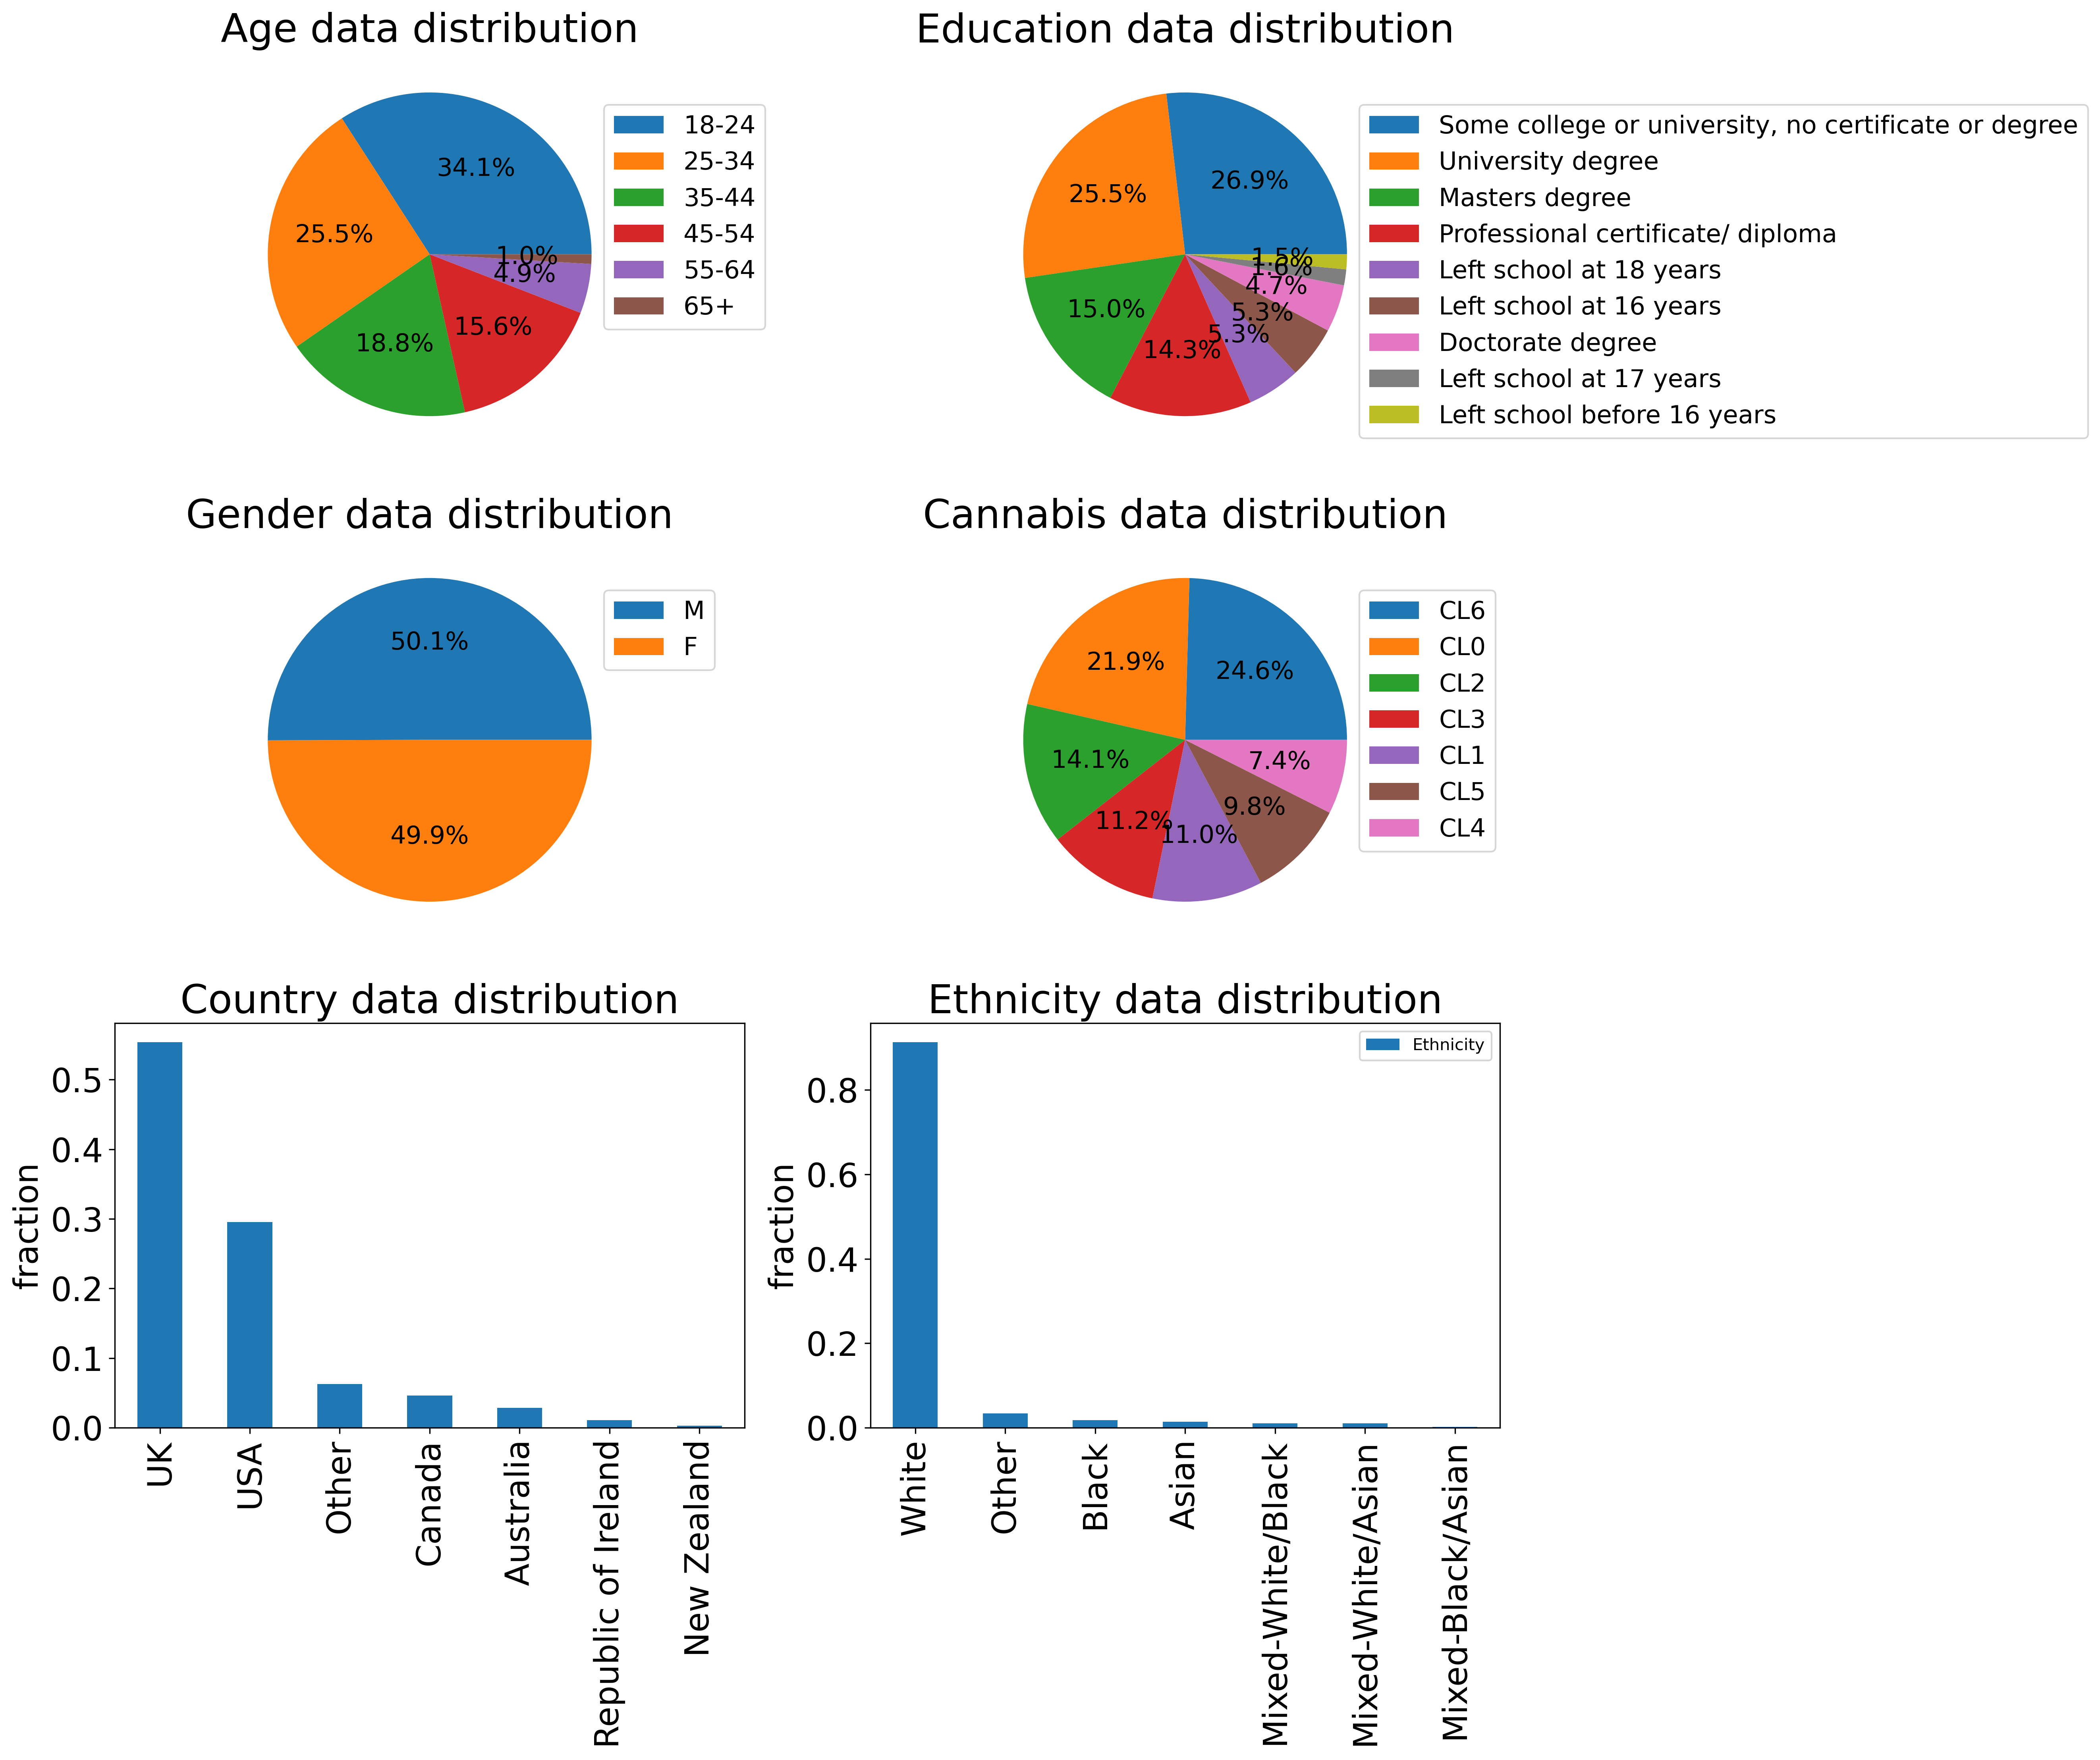

In [12]:
#define subplot layout
fig, axes = plt.subplots(3,2, figsize=(15,15), dpi = 300)

#fig, axes = plt.subplots(test_edu_data = df['Education'])

age_data.plot(kind="pie", autopct='%1.1f%%', legend=True, ylabel='', labeldistance=None, ax=axes[0,0], fontsize=15)
axes[0,0].legend(bbox_to_anchor=(0.9, 0.9), loc='upper left', fontsize=15)
axes[0,0].set_title('Age data distribution',fontdict={'fontsize':24})

edu_data.plot(kind="pie", autopct='%1.1f%%', legend=True, ylabel='', labeldistance=None, ax=axes[0,1], fontsize=15)
axes[0,1].legend(bbox_to_anchor=(0.9, 0.9), loc='upper left', fontsize=15)
axes[0,1].set_title('Education data distribution',fontdict={'fontsize':24})

gender_data.plot(kind="pie", autopct='%1.1f%%', legend=True, ylabel='', labeldistance=None,ax=axes[1,0], fontsize=15)
axes[1,0].legend(bbox_to_anchor=(0.9, 0.9), loc='upper left', fontsize=15)
axes[1,0].set_title('Gender data distribution',fontdict={'fontsize':24})

cannabis_data.plot(kind="pie", autopct='%1.1f%%', legend=True, ylabel='', labeldistance=None,ax=axes[1,1], fontsize=15)
axes[1,1].legend(bbox_to_anchor=(0.9, 0.9), loc='upper left', fontsize=15)
axes[1,1].set_title('Cannabis data distribution',fontdict={'fontsize':24})

country_data.plot(kind="bar",ax=axes[2,0], fontsize=20)
#axes[2,0].legend(bbox_to_anchor=(0.9, 0.9))
axes[2,0].set_title('Country data distribution',fontdict={'fontsize':24})
axes[2,0].set_ylabel('fraction', fontsize = 20)

#ethnicity_data.plot(kind="bar", autopct='%1.1f%%', legend=True, title='Ethnicity data distribution', ylabel='', labeldistance=None,ax=axes[2,0])
#axes[2,1].legend(bbox_to_anchor=(0.9, 0.9), loc='upper left')

ethnicity_data.plot(kind="bar", legend=True,ax=axes[2,1], fontsize=20)
#axes[2,1].legend(bbox_to_anchor=(0.9, 0.9))
axes[2,1].set_title('Ethnicity data distribution',fontdict={'fontsize':24})
axes[2,1].set_ylabel('fraction', fontsize = 20)

plt.savefig(save_images_to + 'Categorical data percentage', dpi=300)

#plt.savefig(save_images_to + 'image.png', dpi = 300)

# plt.show()
# plt.close()

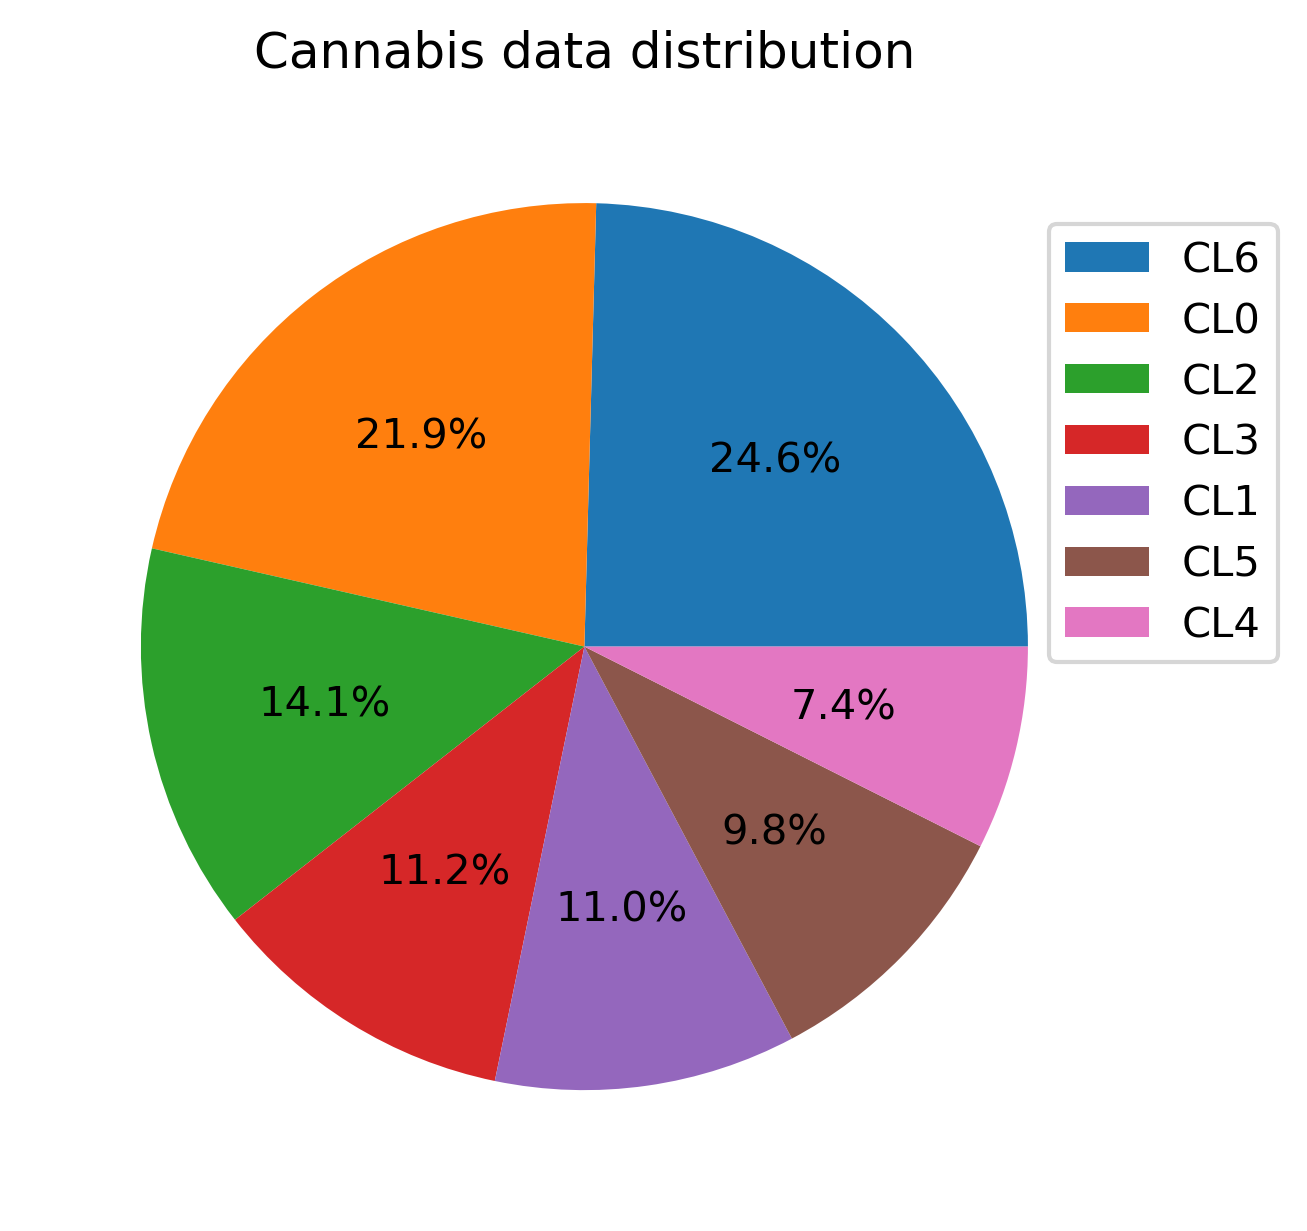

In [13]:
fig, ax = plt.subplots(dpi = 300)

age_data = df["Cannabis"].value_counts()
ax = age_data.plot(kind="pie", autopct='%1.1f%%', legend=True, title='Cannabis data distribution', ylabel='', labeldistance=None)

ax.legend(bbox_to_anchor=(0.9, 0.9), loc='upper left')

plt.savefig(save_images_to + 'Cannabis data distribution', dpi=300)

# plt.show()
# plt.close()

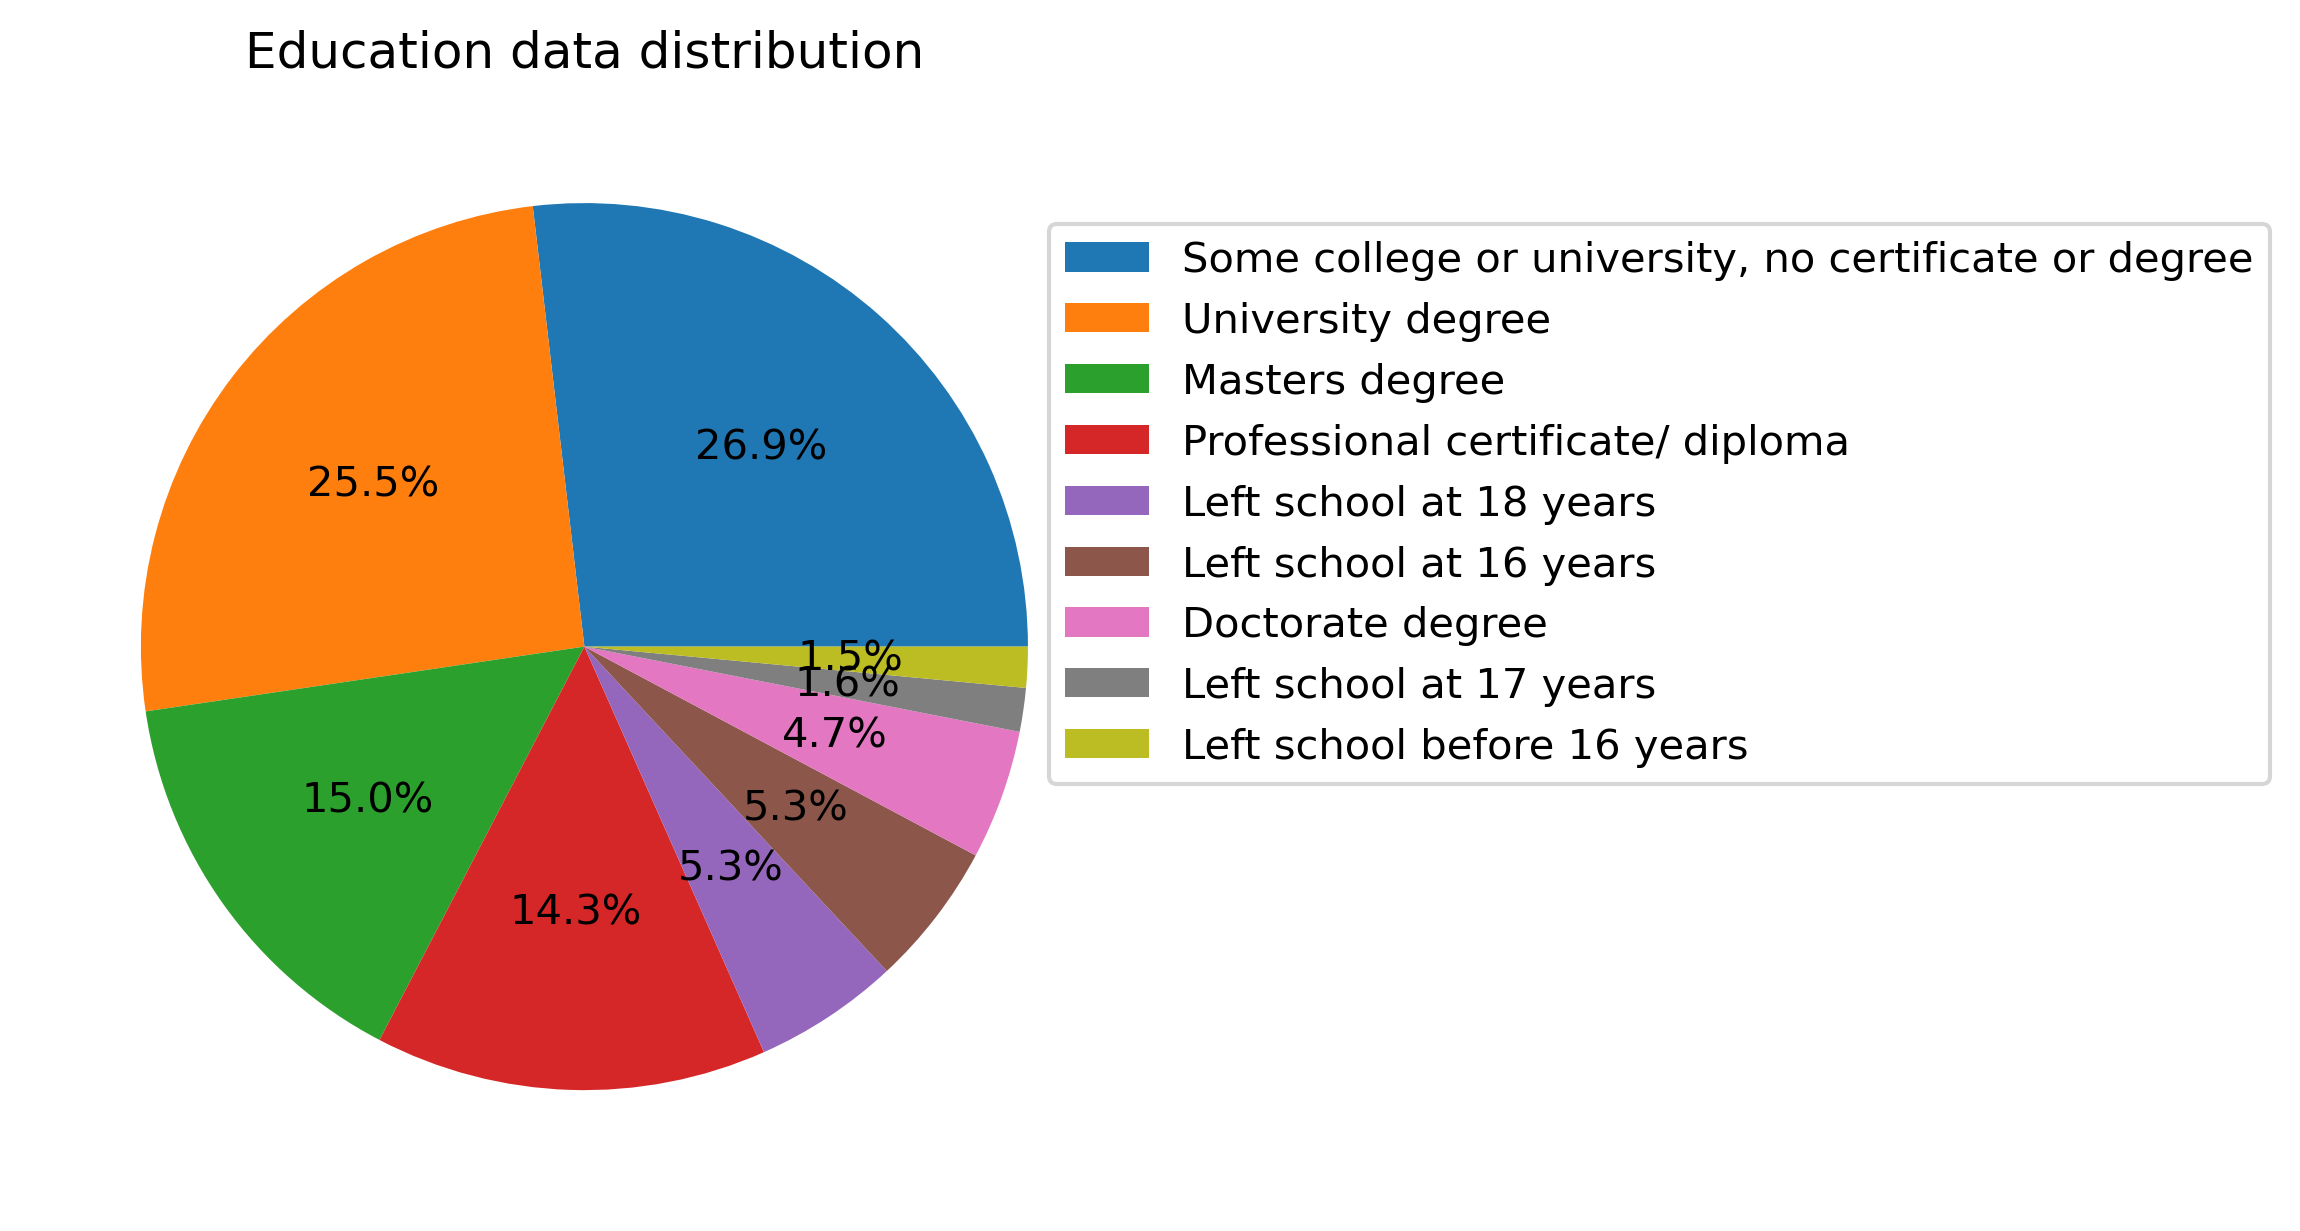

In [14]:
fig, ax = plt.subplots(dpi = 300)

ax = edu_data.plot(kind="pie", autopct='%1.1f%%', legend=True, title='Education data distribution', ylabel='', labeldistance=None)

ax.legend(bbox_to_anchor=(0.9, 0.9), loc='upper left')

plt.savefig(save_images_to + 'Education data distribution', dpi=300)
# plt.close()

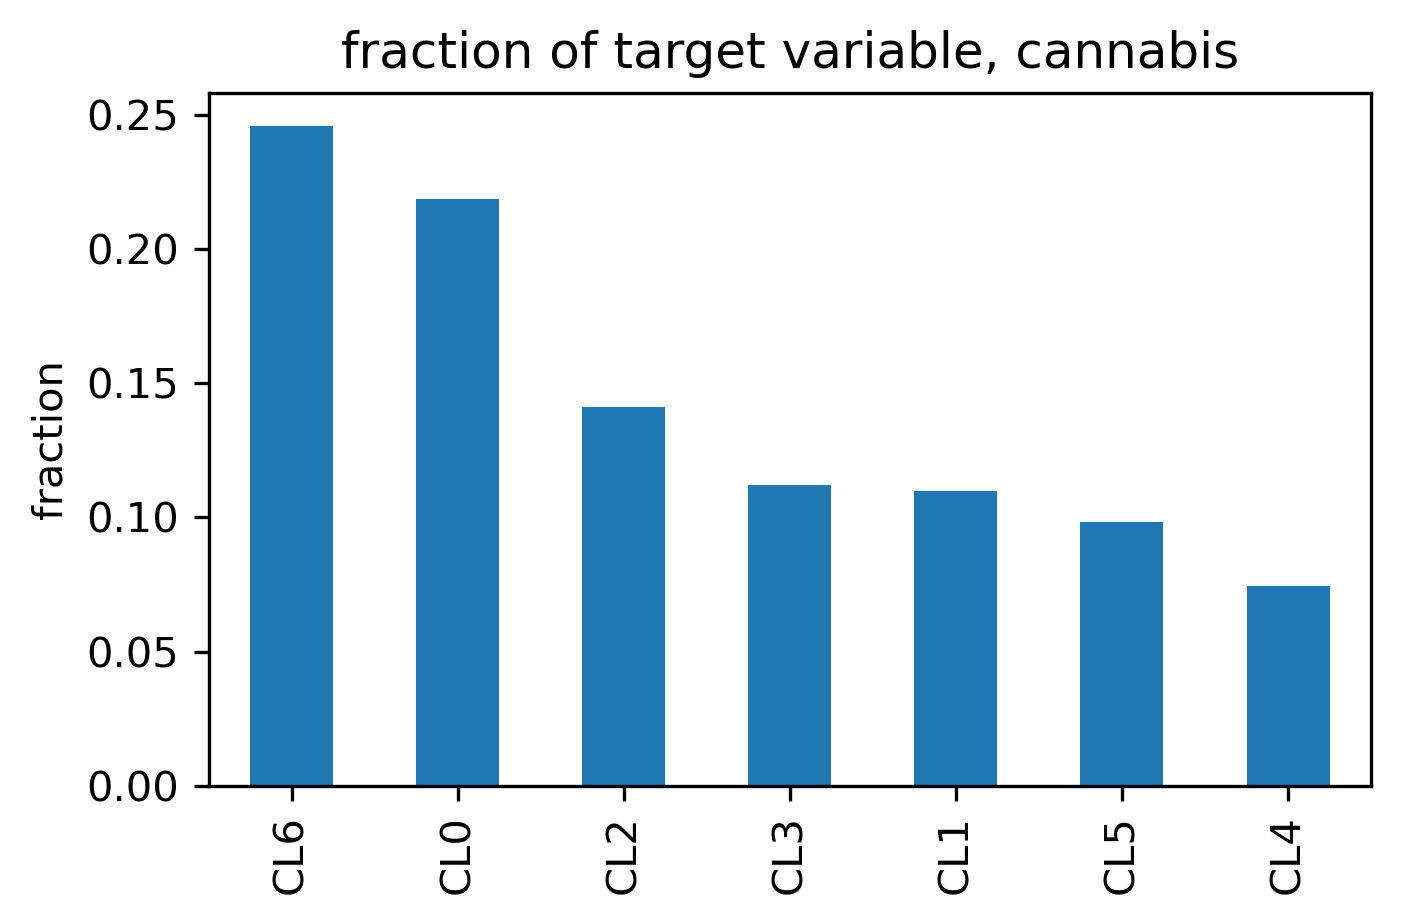

In [15]:
plt.figure(figsize=(5,3), dpi = 300)
pd.value_counts(df['Cannabis'],normalize=True).plot.bar()
plt.ylabel('fraction')
plt.title('fraction of target variable, cannabis')

plt.savefig(save_images_to + 'Cannabis fraction', dpi=300)
# plt.show()
# plt.close()

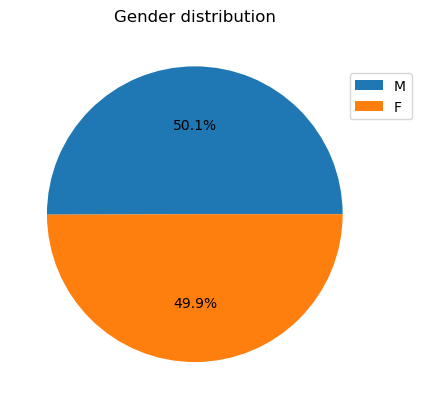

In [16]:
#fig, ax = plt.subplots(dpi = 300)
#

edu_data = df['Gender'].value_counts()
ax = edu_data.plot(kind="pie", autopct='%1.1f%%', legend=True, title='Gender distribution', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(0.9, 0.9), loc='upper left')

plt.savefig(save_images_to + 'Gender data distribution', dpi=300)
# plt.close()

<Figure size 1500x900 with 0 Axes>

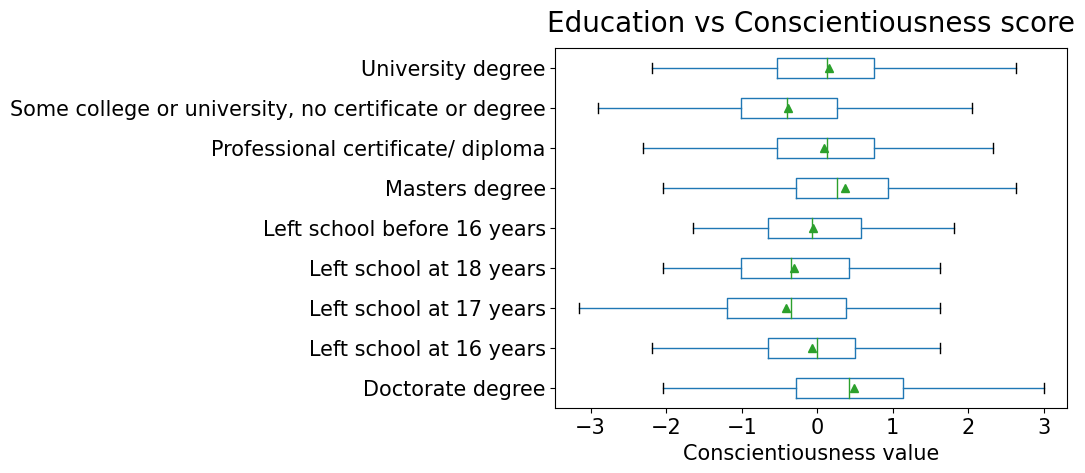

In [17]:
plt.figure(figsize=(5,3), dpi = 300)

df.boxplot(by ='Education', column =['Cscore'],showfliers=False,grid = False, vert = False,showmeans=True, fontsize =15)

plt.title('')
plt.xlabel('Conscientiousness value', fontsize = 15)
plt.suptitle('Education vs Conscientiousness score', fontsize = 20)


plt.savefig(save_images_to + 'Education vs Conscientiousness', dpi=300)
# plt.show()
# plt.close()


<Figure size 1500x900 with 0 Axes>

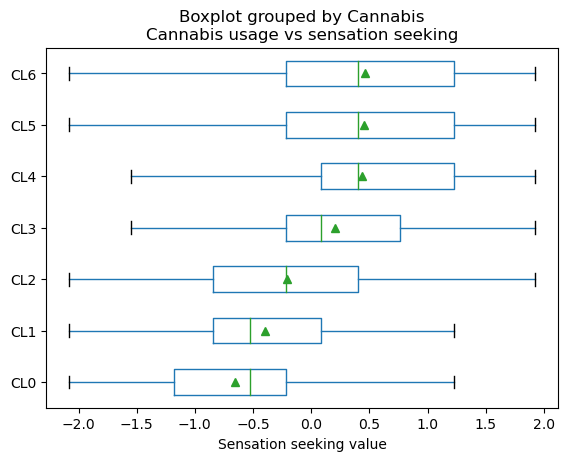

In [18]:
plt.figure(figsize=(5,3), dpi = 300)

df.boxplot(by ='Cannabis', column =['SS'],showfliers=False,grid = False, vert = False, showmeans=True)
plt.title('Cannabis usage vs sensation seeking')
plt.xlabel('Sensation seeking value')


plt.savefig(save_images_to + 'Education vs Sensation Seeking', dpi=300)
# plt.show()
# plt.close()

<Figure size 500x300 with 0 Axes>

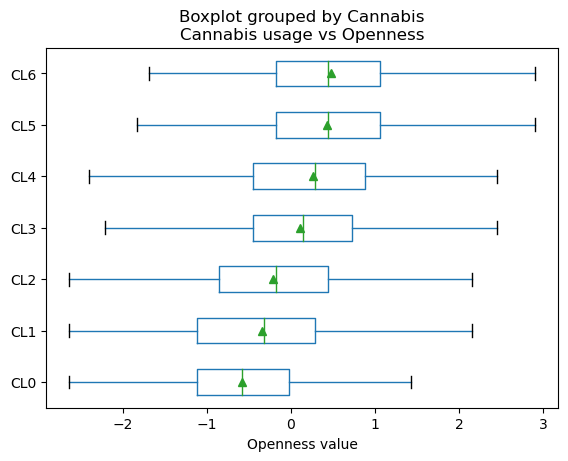

In [19]:
#test_df = df['']
#test_df = pd.DataFrame(data,columns=['Education','Oscore'])
#fig, ax = plt.subplots()O
plt.figure(figsize=(5,3))
#df[['Escore','Age']].plot()
#test_df.plot()

#df.plot.box(x=df['Education'], y='Oscore')

df.boxplot(by ='Cannabis', column =['Oscore'],showfliers=False,grid = False, vert = False, showmeans=True)

#df.T.boxplot(vert=False)



plt.title('Cannabis usage vs Openness')
plt.xlabel('Openness value')
#fig.autofmt_xdate()
plt.savefig(save_images_to + 'Cannabis vs Openness', dpi=300)

# plt.show()
# plt.close()


In [20]:
# Education replacement
df.replace(to_replace ="Left school before 16 years", 
           value = "0", 
           inplace = True)
df.replace(to_replace ="Left school at 16 years", 
           value = "1", 
           inplace = True)
df.replace(to_replace ="Left school at 17 years",
           value = "2", 
           inplace = True)
df.replace(to_replace ="Left school at 18 years",
           value = "3", 
           inplace = True)
df.replace(to_replace ="Some college or university, no certificate or degree",
           value = "4", 
           inplace = True)
df.replace(to_replace ="Professional certificate/ diploma",
           value = "5", 
           inplace = True)
df.replace(to_replace ="University degree",
           value = "6", 
           inplace = True)
df.replace(to_replace ="Masters degree",
           value = "7", 
           inplace = True)
df.replace(to_replace ="Doctorate degree",
           value = "8", 
           inplace = True)

# Gender replacement
df.replace(to_replace ="M", 
           value = "0", 
           inplace = True)
df.replace(to_replace ="F", 
           value = "1", 
           inplace = True)

# Drug usage replacement
# df.replace(to_replace ="CL0", 
#            value = "0", 
#            inplace = True)
# df.replace(to_replace ="CL1", 
#            value = "1", 
#            inplace = True)
# df.replace(to_replace ="CL2",
#            value = "2", 
#            inplace = True)
# df.replace(to_replace ="CL3",
#            value = "3", 
#            inplace = True)
# df.replace(to_replace ="CL4",
#            value = "4", 
#            inplace = True)
# df.replace(to_replace ="CL5",
#            value = "5", 
#            inplace = True)
# df.replace(to_replace ="CL6",
#            value = "6", 
#            inplace = True)

# AGE replacement
df.replace(to_replace ="18-24", 
           value = "0", 
           inplace = True)
df.replace(to_replace ="25-34", 
           value = "1", 
           inplace = True)
df.replace(to_replace ="35-44",
           value = "2", 
           inplace = True)
df.replace(to_replace ="45-54",
           value = "3", 
           inplace = True)
df.replace(to_replace ="55-64",
           value = "4", 
           inplace = True)
df.replace(to_replace ="65+",
           value = "5", 
           inplace = True)

df['Education'] = df['Education'].astype(str).astype(int)


# df['Gender'] = df['Gender'].astype(str).astype(int)

# df['Cannabis'] = df['Cannabis'].astype(str).astype(int)
# df['Crack'] = df['Crack'].astype(str).astype(int)
# df['Coke'] = df['Coke'].astype(str).astype(int)



print ('Education: ',df['Education'].dtypes)
print ('Gender: ',df['Gender'].dtypes)
print ('Cannabis: ',df['Cannabis'].dtypes)
print ('Age: ',df['Age'].dtypes)
print ('Country: ',df['Country'].dtypes)


print (df.head())

Education:  int64
Gender:  object
Cannabis:  object
Age:  object
Country:  object
  Age Gender  Education Country Ethnicity   Nscore   Escore   Oscore   Ascore  \
0   1      0          8      UK     White -0.67825  1.93886  1.43533  0.76096   
1   2      0          5      UK     White -0.46725  0.80523 -0.84732 -1.62090   
2   0      1          7      UK     White -0.14882 -0.80615 -0.01928  0.59042   
3   2      1          8      UK     White  0.73545 -1.63340 -0.45174 -0.30172   
4   5      1          3  Canada     White -0.67825 -0.30033 -1.55521  2.03972   

    Cscore  ...  Benzos  Cannabis Coke Crack Ecstasy Heroin  LSD Meth  \
0 -0.14277  ...     CL0       CL4  CL3   CL0     CL4    CL0  CL2  CL3   
1 -1.01450  ...     CL0       CL3  CL0   CL0     CL0    CL0  CL0  CL0   
2  0.58489  ...     CL3       CL2  CL2   CL0     CL0    CL0  CL0  CL0   
3  1.30612  ...     CL0       CL3  CL0   CL0     CL1    CL0  CL0  CL0   
4  1.63088  ...     CL0       CL0  CL0   CL0     CL0    CL0  CL0  

In [21]:
Countries = ['Australia','Canada','New Zealand','Other', 'Republic of Ireland','UK','USA']

def country_encoder(x):
    if x == 'Australia':
        return 'Australia'
    elif x == 'Canada':
        return 'Canada'
    elif x == 'New Zealand':
        return 'New_Zealand'
    elif x == 'Other':
        return 'Other'
    elif x == 'Republic of Ireland':
        return 'Ireland'
    elif x == 'UK':
        return 'UK'
    else:
        return 'USA'
    
df['Country'] = df['Country'].apply(country_encoder)

print ('Country: ',df['Country'].dtypes)

Country:  object


In [22]:
#print (df['Age'].dtypes)

In [23]:
Ethnicity = ['White','Asian','Mixed-White/Asian','Mixed-White/Black','Other']

def ethnicity_encoder(x):
    if x == 'White':
        return 0
    elif x == 'Asian':
        return 1
    elif x == 'Mixed-White/Asian':
        return 2
    elif x == 'Other':
        return 3
    elif x == 'Mixed-White/Black':
        return 4
    else:
        return 5

    
df['Ethnicity'] = df['Ethnicity'].apply(ethnicity_encoder)

print ('Ethnicity: ',df['Ethnicity'].dtypes)

Ethnicity:  int64


In [24]:
print (df.head())

  Age Gender  Education Country  Ethnicity   Nscore   Escore   Oscore  \
0   1      0          8      UK          0 -0.67825  1.93886  1.43533   
1   2      0          5      UK          0 -0.46725  0.80523 -0.84732   
2   0      1          7      UK          0 -0.14882 -0.80615 -0.01928   
3   2      1          8      UK          0  0.73545 -1.63340 -0.45174   
4   5      1          3  Canada          0 -0.67825 -0.30033 -1.55521   

    Ascore   Cscore  ...  Benzos  Cannabis Coke Crack Ecstasy Heroin  LSD  \
0  0.76096 -0.14277  ...     CL0       CL4  CL3   CL0     CL4    CL0  CL2   
1 -1.62090 -1.01450  ...     CL0       CL3  CL0   CL0     CL0    CL0  CL0   
2  0.59042  0.58489  ...     CL3       CL2  CL2   CL0     CL0    CL0  CL0   
3 -0.30172  1.30612  ...     CL0       CL3  CL0   CL0     CL1    CL0  CL0   
4  2.03972  1.63088  ...     CL0       CL0  CL0   CL0     CL0    CL0  CL0   

  Meth Mushrooms Nicotine  
0  CL3       CL0      CL4  
1  CL0       CL1      CL0  
2  CL0       C

In [25]:
pd.value_counts(df['Cannabis'])

CL6    463
CL0    412
CL2    266
CL3    211
CL1    207
CL5    185
CL4    140
Name: Cannabis, dtype: int64

In [26]:
#pd.value_counts(df['Meth'])

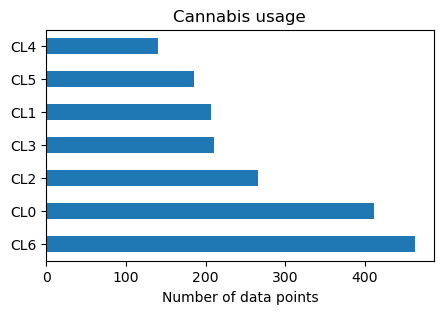

In [27]:
plt.figure(figsize=(5,3))

pd.value_counts(df['Cannabis']).plot.barh()
plt.title('Cannabis usage')
plt.xlabel('Number of data points')
plt.savefig(save_images_to + 'Number of cannabis usage', dpi=300)

# plt.show()
# plt.close()


In [28]:
count_matrix = df.groupby(['Coke','Crack']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
print (count_matrix_norm)

Crack       CL0       CL1       CL2       CL3       CL4       CL5       CL6
Coke                                                                       
CL0    0.993250       NaN  0.003857  0.002893       NaN       NaN       NaN
CL1    0.743750  0.218750  0.031250       NaN       NaN  0.006250       NaN
CL2    0.677778  0.077778  0.218519  0.025926       NaN       NaN       NaN
CL3    0.705426  0.027132  0.093023  0.143411  0.011628  0.019380       NaN
CL4    0.717172  0.030303  0.131313  0.070707  0.030303       NaN  0.020202
CL5    0.731707       NaN  0.097561  0.097561  0.024390  0.048780       NaN
CL6    0.578947  0.052632  0.157895  0.052632  0.105263  0.052632       NaN


<Figure size 500x300 with 0 Axes>

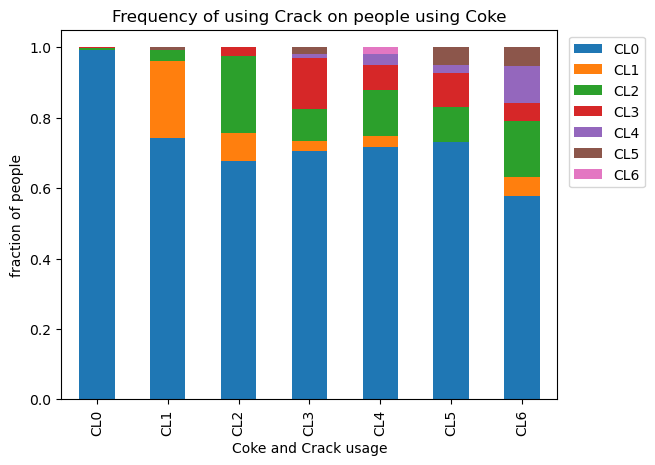

In [29]:
plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)

plt.title('Frequency of using Crack on people using Coke')
plt.ylabel('fraction of people')
plt.xlabel('Coke and Crack usage')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))


plt.savefig(save_images_to + 'Cocaine and Crack dependent usage', dpi=300)

# plt.show()
# plt.close()

In [30]:
count_matrix = df.groupby(['Nicotine','Cannabis']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
print (count_matrix_norm)



Cannabis       CL0       CL1       CL2       CL3       CL4       CL5       CL6
Nicotine                                                                      
CL0       0.614486  0.107477  0.072430  0.046729  0.042056  0.030374  0.086449
CL1       0.264249  0.341969  0.150259  0.067358  0.025907  0.046632  0.103627
CL2       0.152709  0.147783  0.399015  0.093596  0.044335  0.034483  0.128079
CL3       0.037838  0.064865  0.178378  0.167568  0.124324  0.118919  0.308108
CL4       0.092593  0.064815  0.055556  0.185185  0.212963  0.166667  0.222222
CL5       0.063694  0.019108  0.108280  0.159236  0.095541  0.248408  0.305732
CL6       0.065574  0.070492  0.113115  0.136066  0.077049  0.126230  0.411475


<Figure size 500x300 with 0 Axes>

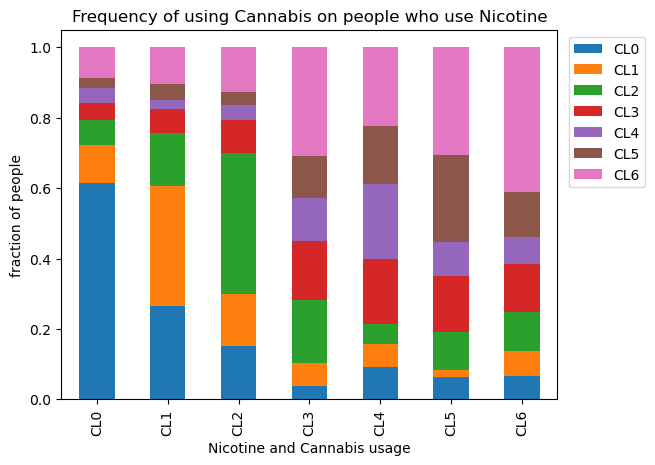

In [31]:
plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)

plt.title('Frequency of using Cannabis on people who use Nicotine')
plt.ylabel('fraction of people')
plt.xlabel('Nicotine and Cannabis usage')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
plt.savefig(save_images_to + 'Nicotine and Cannabis dependent usage', dpi=300)

# plt.show()
# plt.close()


In [32]:
print (df.head())

  Age Gender  Education Country  Ethnicity   Nscore   Escore   Oscore  \
0   1      0          8      UK          0 -0.67825  1.93886  1.43533   
1   2      0          5      UK          0 -0.46725  0.80523 -0.84732   
2   0      1          7      UK          0 -0.14882 -0.80615 -0.01928   
3   2      1          8      UK          0  0.73545 -1.63340 -0.45174   
4   5      1          3  Canada          0 -0.67825 -0.30033 -1.55521   

    Ascore   Cscore  ...  Benzos  Cannabis Coke Crack Ecstasy Heroin  LSD  \
0  0.76096 -0.14277  ...     CL0       CL4  CL3   CL0     CL4    CL0  CL2   
1 -1.62090 -1.01450  ...     CL0       CL3  CL0   CL0     CL0    CL0  CL0   
2  0.59042  0.58489  ...     CL3       CL2  CL2   CL0     CL0    CL0  CL0   
3 -0.30172  1.30612  ...     CL0       CL3  CL0   CL0     CL1    CL0  CL0   
4  2.03972  1.63088  ...     CL0       CL0  CL0   CL0     CL0    CL0  CL0   

  Meth Mushrooms Nicotine  
0  CL3       CL0      CL4  
1  CL0       CL1      CL0  
2  CL0       C

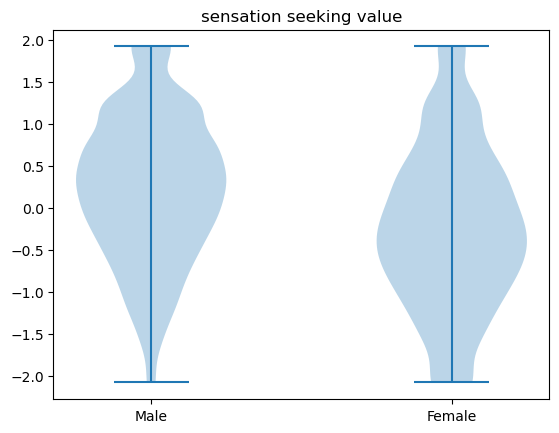

In [33]:

# #print (df.head())

dataset = [df[df['Gender']=='0']['SS'].values,
           df[df['Gender']=='1']['SS'].values]

#print (dataset)
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Male','Female'])
#plt.ylabel('Sensation seeking value')
plt.title('sensation seeking value')

plt.savefig(save_images_to + 'Gender vs SS value', dpi=300)

# plt.show()
# plt.close()


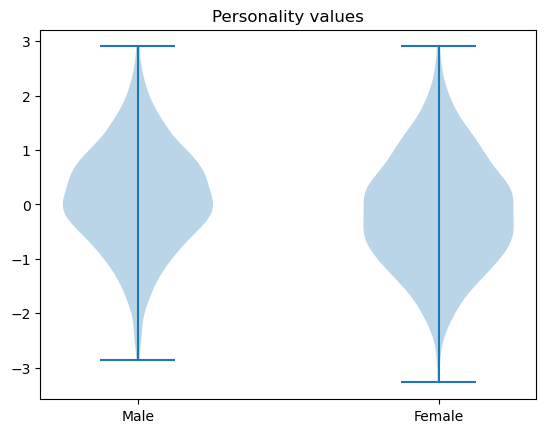

In [34]:

# #print (df.head())

dataset = [df[df['Gender']=='0']['Oscore'].values,
           df[df['Gender']=='1']['Oscore'].values]

#print (dataset)
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Male','Female'])
#plt.ylabel('Open to experience value')
plt.title('Personality values')
plt.savefig(save_images_to + 'Gender vs personality values', dpi=300)


# plt.show()
# plt.close()


## Splitting

In [35]:
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold
y = df['Cannabis']
X = df.iloc[:, 0:12]

#print (X)

In [36]:
random_state = 42
df['Age'] = df['Age'].astype(str).astype(int)
#df['Cannabis'] = df['Cannabis'].astype(str).astype(int)
df['Gender'] = df['Gender'].astype(str).astype(int)
# # first split to separate out the training set
# X_train, X_other, y_train, y_other = train_test_split(X,y,\
#                     train_size = 0.6,random_state = random_state)
# print('training set: \n',X_train.shape, y_train.shape) # 80% of points are in train
# print('X_other and y_other shpes: \n',X_other.shape, y_other.shape) # 20% of points are in other

# # second split to separate out the validation and test sets
# X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
#                     train_size = 0.5,random_state = random_state)
# print('validation set: \n',X_val.shape, y_val.shape) # 10% of points are in validation
# print('test set: \n',X_test.shape, y_test.shape, '\n') # 10% of points are in test

# print('X train head: \n',X_train.head())

####################################################################################################

# # Stratified train_test_split, different from normal train_test_split
# X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
# X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
# print('**balance with stratification:**')
# # very little variation (in the 4th decimal point only) which is important if the problem is imbalanced
# print(np.unique(y_train,return_counts=True))
# print(np.unique(y_val,return_counts=True))
# print(np.unique(y_test,return_counts=True))

# ##############################################################################################

# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
# X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size = 0.25, random_state=0)

# print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
#     print('new fold')
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
#     print(np.unique(y_train,return_counts=True))
#     print(np.unique(y_val,return_counts=True))

In [37]:
print (len(X_train))

1131


## Preprocessing

In [38]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
# test_df = df.copy()
# test_df['Cannabis_User'] = test_df['Cannabis'].apply(lambda x: 1 if x not in [0,1] else 0)
# test_df = test_df.drop(['Cannabis'], axis=1)

In [40]:
# collect which encoder to use on each feature
# needs to be done manually
#ordinal_ftrs = ['Age'] #Can be ranked
ordinal_ftrs = ['Age','Education'] #Can be ranked

#ordinal_cats = [['0','1','2','3','4','5']]
ordinal_cats = [['0','1','2','3','4','5'],['0','1','2','3','4','5','6','7','8']]

#ordinal_cats = [['25-34', '45-54', '35-44', '55-64', '65+', '18-24']]
onehot_ftrs = ['Gender','Country','Ethnicity']
#minmax_ftrs = ['Education','SS']
std_ftrs = ['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

X_prep = preprocessor.fit_transform(X_train)

# feature_names = preprocessor.get_feature_names_out()
# df_test = preprocessor.transform(X_test)
# df_test = pd.DataFrame(data=df_test, columns= feature_names)

# df_CV = preprocessor.transform(X_CV)
# df_CV = pd.DataFrame(data=df_CV, columns= feature_names)

# df_train = pd.DataFrame(data=X_prep, columns = feature_names)
# print('Shape of X_train: \n', X_train.shape, '\n')
# print('Shape of X_train prep: \n', X_train_prep.shape, '\n')
# print('Shape of X_val: \n', X_val.shape, '\n')
# print('Shape of X_val_prep: \n', X_val_prep.shape, '\n')
# print('Shape of X_test: \n', X_test.shape, '\n')
# print('Shape of X_test_prep: \n', X_test_prep.shape, '\n')

# print('X_train prep: \n',X_train_prep)
param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5,0.75,1.0] # linearly spaced between 0.5 and 1
              } 

nr_states = 3
test_scores = np.zeros(nr_states)
final_models = []

test = []


for i in range(nr_states):
    # first split to separate out the test set
    # we will use kfold on other
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

    # splitter for other
    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)

    # the classifier
    clf = RandomForestClassifier(random_state = 42*i) # initialize the classifier

    # let's put together a pipeline
    # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
    # then it will train the ML algorithm on the training set and evaluate it on the validation set
    # it repeats this step automatically such that each fold will be an evaluation set once
    pipe = make_pipeline(preprocessor,clf)

    # use GridSearchCV
    # GridSearchCV loops through all parameter combinations and collects the results 
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    
    # this line actually fits the model on other
    grid.fit(X_other, y_other)
    # save results into a data frame. feel free to print it and inspect it
    results = pd.DataFrame(grid.cv_results_)
    #print(results)

    print('best model parameters:',grid.best_params_)
    print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
    # save the model
    final_models.append(grid)
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])

Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.75}
validation score: 0.40875966476663467
test score: 0.40318302387267907
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.5}
validation score: 0.40411422766521815
test score: 0.40318302387267907
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.40811064394153174
test score: 0.38461538461538464


In [41]:
f_test, p_value = f_classif(X_train_prep,y_train)
#print (f_test)

mi = mutual_info_classif(X_train_prep,y_train)

print ("f_classif \n",f_test, "\n")
#print ("f_classif \n",f_test_class, "\n")
print ("mutual_info_classif \n",mi, "\n")
#print ("mutual_info_classif \n",d, "\n")

#plt.bar(X,y)

f_classif 
 [58.29496849 14.18435152 19.63498369 19.63498369  3.41658914  0.83254909
  1.08528443  0.86767008  2.98155405 85.35500227 55.91783301  2.7518174
  2.12183358  0.66222517  1.03428988  1.40345526  3.79446451  4.82013623
  0.50341903 37.97264053  5.609798   15.52439351 21.14390929 50.94981555] 

mutual_info_classif 
 [0.17118442 0.07193208 0.01768697 0.03930487 0.         0.
 0.         0.         0.         0.16135811 0.12604058 0.02286952
 0.         0.0134115  0.03438148 0.         0.0230345  0.02493282
 0.01704719 0.04898231 0.04563485 0.0512999  0.07459257 0.16277149] 



In [42]:
f_test, p_value = f_classif(X_train_prep,y_train)
#print (f_test)

mi = mutual_info_classif(X_train_prep,y_train)

print ("f_classif \n",f_test, "\n")
#print ("f_classif \n",f_test_class, "\n")
print ("mutual_info_classif \n",mi, "\n")
#print ("mutual_info_classif \n",d, "\n")

#plt.bar(X,y)

feature_name = preprocessor.get_feature_names_out()

print (feature_name.shape)
# print (feature_name)

features_test = np.array(feature_name)

print (features_test.shape)
# print (features_test)

f_classif 
 [58.29496849 14.18435152 19.63498369 19.63498369  3.41658914  0.83254909
  1.08528443  0.86767008  2.98155405 85.35500227 55.91783301  2.7518174
  2.12183358  0.66222517  1.03428988  1.40345526  3.79446451  4.82013623
  0.50341903 37.97264053  5.609798   15.52439351 21.14390929 50.94981555] 

mutual_info_classif 
 [0.15500317 0.07613872 0.07223084 0.07235115 0.         0.
 0.01386416 0.02139356 0.         0.15106254 0.13086713 0.
 0.00437329 0.         0.01919335 0.01536993 0.         0.03750177
 0.         0.07479341 0.01235402 0.02295463 0.03425918 0.10862862] 

(24,)
(24,)


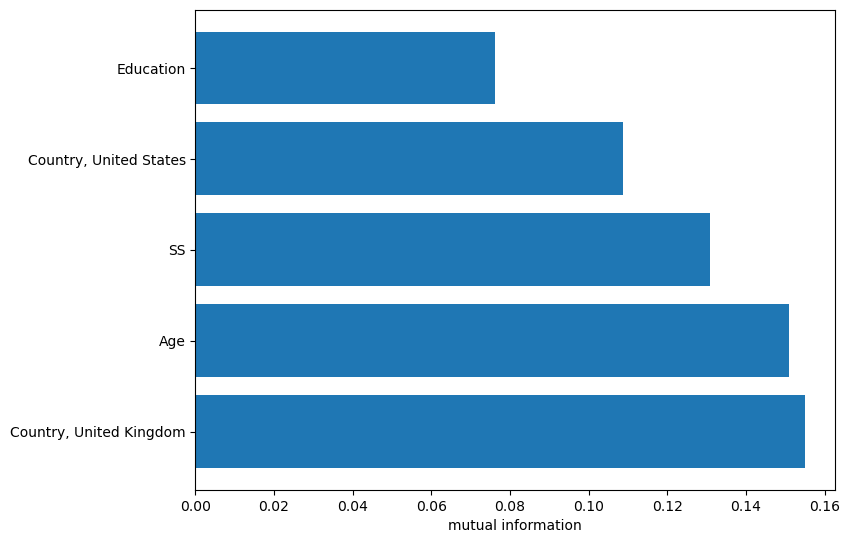

In [43]:
####################################################################
# 이상하게 preprocessing 할때, 오디널 인코더에 교육을 넣으면 이렇게되네? 나중에 교육을 다른데로 빼던가 ㄱㄱ
# 화요일에 돌림. 이상하게 이번에는 다 잘맞게 나옴.
######################################################################

indices = np.argsort(mi)[::-1][:5]
#print (mi)
#print (mi[indices])
features_test = np.array(feature_name)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(features_test[indices],mi[indices], tick_label = ['Country, United Kingdom','Age','SS','Country, United States','Education'])
ax.set_xlabel('mutual information')

plt.savefig(save_images_to + 'top5 mutual info value', dpi=300)
# plt.close()

In [44]:
print (df.head())

   Age  Gender  Education Country  Ethnicity   Nscore   Escore   Oscore  \
0    1       0          8      UK          0 -0.67825  1.93886  1.43533   
1    2       0          5      UK          0 -0.46725  0.80523 -0.84732   
2    0       1          7      UK          0 -0.14882 -0.80615 -0.01928   
3    2       1          8      UK          0  0.73545 -1.63340 -0.45174   
4    5       1          3  Canada          0 -0.67825 -0.30033 -1.55521   

    Ascore   Cscore  ...  Benzos  Cannabis Coke Crack Ecstasy Heroin  LSD  \
0  0.76096 -0.14277  ...     CL0       CL4  CL3   CL0     CL4    CL0  CL2   
1 -1.62090 -1.01450  ...     CL0       CL3  CL0   CL0     CL0    CL0  CL0   
2  0.59042  0.58489  ...     CL3       CL2  CL2   CL0     CL0    CL0  CL0   
3 -0.30172  1.30612  ...     CL0       CL3  CL0   CL0     CL1    CL0  CL0   
4  2.03972  1.63088  ...     CL0       CL0  CL0   CL0     CL0    CL0  CL0   

  Meth Mushrooms Nicotine  
0  CL3       CL0      CL4  
1  CL0       CL1      CL0  
2 

In [45]:
drugs = ['Amphet','Benzos','Cannabis','Coke','Crack','Ecstasy','Heroin','LSD','Meth','Mushrooms','Nicotine']

In [46]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL4':
        return 5
    elif x == 'CL5':
        return 6
    else:
        return 7

In [47]:
for column in drugs:
    df[column] = df[column].apply(drug_encoder)

In [48]:
df['Gender'] = df['Gender'].astype(str).astype(int)

In [49]:
print (df.head())

   Age  Gender  Education Country  Ethnicity   Nscore   Escore   Oscore  \
0    1       0          8      UK          0 -0.67825  1.93886  1.43533   
1    2       0          5      UK          0 -0.46725  0.80523 -0.84732   
2    0       1          7      UK          0 -0.14882 -0.80615 -0.01928   
3    2       1          8      UK          0  0.73545 -1.63340 -0.45174   
4    5       1          3  Canada          0 -0.67825 -0.30033 -1.55521   

    Ascore   Cscore  ...  Benzos  Cannabis  Coke  Crack  Ecstasy  Heroin  LSD  \
0  0.76096 -0.14277  ...       0         4     3      0        4       0    2   
1 -1.62090 -1.01450  ...       0         3     0      0        0       0    0   
2  0.59042  0.58489  ...       3         2     2      0        0       0    0   
3 -0.30172  1.30612  ...       0         3     0      0        1       0    0   
4  2.03972  1.63088  ...       0         0     0      0        0       0    0   

   Meth  Mushrooms  Nicotine  
0     3          0         4  


In [50]:
df['Gender'].dtypes

dtype('int64')

In [51]:
df['Education'].dtypes

dtype('int64')

In [52]:
# df['Education'].astype(object).astype(int)
#pd.to_numeric(s, errors='coerce').convert_dtypes() 
df['Education'] = df['Education'].astype(str).astype(int)

In [53]:
#df['Country'] = df['Country'].astype(str).astype(int)

In [54]:
df['Education'].dtypes

dtype('int64')

In [55]:
# df = df.drop(['Amphet','Benzos','Coke','Crack','Ecstasy','Heroin','LSD','Meth','Mushrooms'], axis=1)

In [56]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [57]:

xgb_cl = xgb.XGBClassifier()


In [58]:
df_new = pd.read_csv('/Users/youbinkim/Documents/2022_Fall/project/data/Drug_Consumption.csv')
#df_new = df.drop('ID', axis=1)
# collect which encoder to use on each feature
# needs to be done manually
#ordinal_ftrs = ['Age'] #Can be ranked
ordinal_ftrs = ['Age','Education'] #Can be ranked

#ordinal_cats = [['0','1','2','3','4','5']]
ordinal_cats = [['0','1','2','3','4','5'],['0','1','2','3','4','5','6','7','8']]

#ordinal_cats = [['25-34', '45-54', '35-44', '55-64', '65+', '18-24']]
onehot_ftrs = ['Gender','Country','Ethnicity']
#minmax_ftrs = ['Education','SS']
std_ftrs = ['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

feature_names = preprocessor.get_feature_names_out()
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test, columns=feature_names)

#df_test = preprocessor.transform(X_test)
# print('Shape of X_train: \n', X_train.shape, '\n')
# print('Shape of X_train prep: \n', X_train_prep.shape, '\n')
# print('Shape of X_val: \n', X_val.shape, '\n')
# print('Shape of X_val_prep: \n', X_val_prep.shape, '\n')
# print('Shape of X_test: \n', X_test.shape, '\n')
# print('Shape of X_test_prep: \n', X_test_prep.shape, '\n')

# print('X_train prep: \n',X_train_prep)
param_grid = {
              'randomforestclassifier__max_depth': [1, 3, 10, 30, 100], # the max_depth should be smaller or equal than the number of features roughly
              'randomforestclassifier__max_features': [0.5,0.75,1.0] # linearly spaced between 0.5 and 1
              } 

nr_states = 3
test_scores = np.zeros(nr_states)
final_models = []

test = []


for i in range(nr_states):
    # first split to separate out the test set
    # we will use kfold on other
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

    # splitter for other
    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=42*i)

    # the classifier
    clf = RandomForestClassifier(random_state = 42*i) # initialize the classifier

    # let's put together a pipeline
    # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
    # then it will train the ML algorithm on the training set and evaluate it on the validation set
    # it repeats this step automatically such that each fold will be an evaluation set once
    pipe = make_pipeline(preprocessor,clf)

    # use GridSearchCV
    # GridSearchCV loops through all parameter combinations and collects the results 
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'accuracy',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    
    # this line actually fits the model on other
    grid.fit(X_other, y_other)
    # save results into a data frame. feel free to print it and inspect it
    results = pd.DataFrame(grid.cv_results_)
    #print(results)

    print('best model parameters:',grid.best_params_)
    print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
    # save the model
    final_models.append(grid)
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])


Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.75}
validation score: 0.40875966476663467
test score: 0.40318302387267907
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 0.5}
validation score: 0.40411422766521815
test score: 0.40318302387267907
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 0.5}
validation score: 0.40811064394153174
test score: 0.38461538461538464


In [59]:
f_test, p_value = f_classif(X_train_prep,y_train)
#print (f_test)

mi = mutual_info_classif(X_train_prep,y_train)

print ("f_classif \n",f_test, "\n")
#print ("f_classif \n",f_test_class, "\n")
print ("mutual_info_classif \n",mi, "\n")
#print ("mutual_info_classif \n",d, "\n")

#plt.bar(X,y)

feature_name = preprocessor.get_feature_names_out()

print (feature_name.shape)
# print (feature_name)

features_test = np.array(feature_name)

print (features_test.shape)
# print (features_test)

f_classif 
 [58.29496849 14.18435152 19.63498369 19.63498369  3.41658914  0.83254909
  1.08528443  0.86767008  2.98155405 85.35500227 55.91783301  2.7518174
  2.12183358  0.66222517  1.03428988  1.40345526  3.79446451  4.82013623
  0.50341903 37.97264053  5.609798   15.52439351 21.14390929 50.94981555] 

mutual_info_classif 
 [0.14847524 0.11297788 0.06592539 0.04804108 0.         0.
 0.01968835 0.         0.01763548 0.17552634 0.13205852 0.01574959
 0.         0.00976975 0.00742094 0.         0.         0.03191075
 0.         0.09780466 0.01122094 0.02723654 0.03610411 0.1113981 ] 

(24,)
(24,)


/var/folders/cf/bmwx3mj53971w4_9gngj_9m00000gn/T/ipykernel_26326/1046560541.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


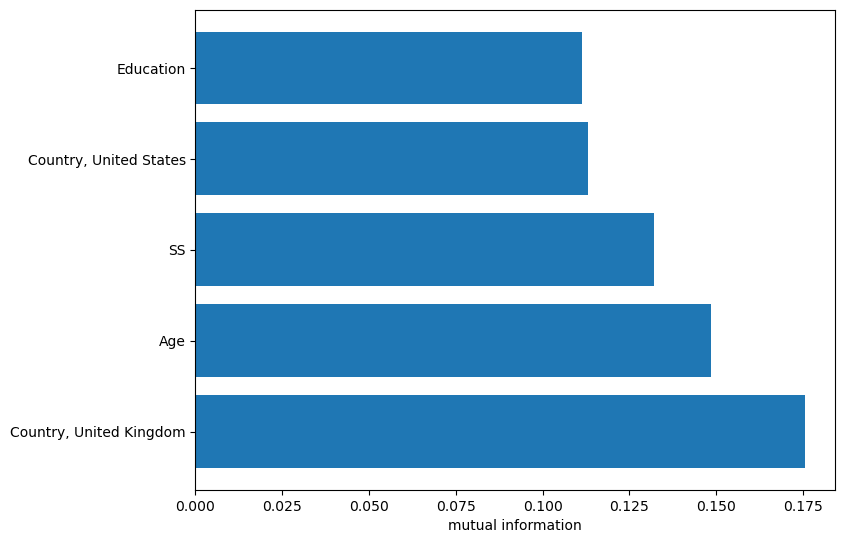

In [60]:
####################################################################
# 이상하게 preprocessing 할때, 오디널 인코더에 교육을 넣으면 이렇게되네? 나중에 교육을 다른데로 빼던가 ㄱㄱ
# 화요일에 돌림. 이상하게 이번에는 다 잘맞게 나옴.
######################################################################

indices = np.argsort(mi)[::-1][:5]
#print (mi)
#print (mi[indices])
features_test = np.array(feature_name)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(features_test[indices],mi[indices], tick_label = ['Country, United Kingdom','Age','SS','Country, United States','Education'])
ax.set_xlabel('mutual information')
plt.tight_layout()

plt.savefig(save_images_to + 'top5 mutual info value', dpi=300)
# plt.close()

/var/folders/cf/bmwx3mj53971w4_9gngj_9m00000gn/T/ipykernel_26326/1046560541.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


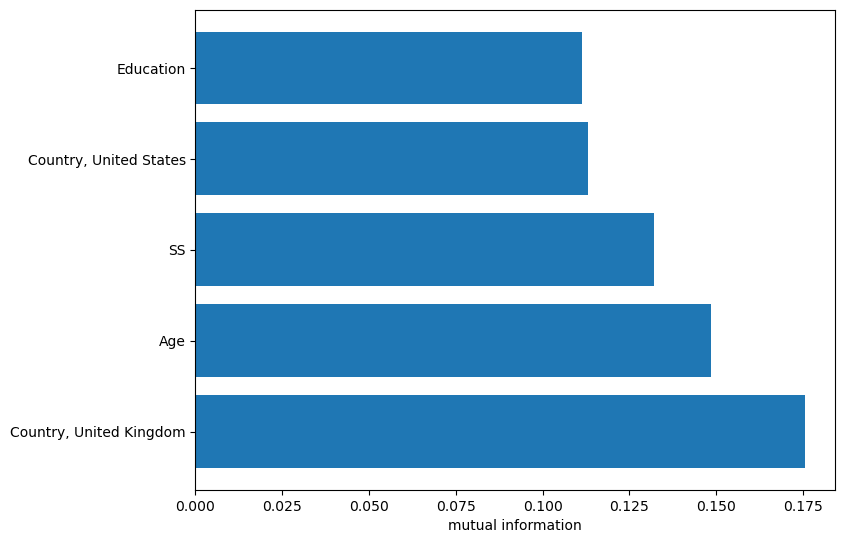

In [61]:
####################################################################
# 이상하게 preprocessing 할때, 오디널 인코더에 교육을 넣으면 이렇게되네? 나중에 교육을 다른데로 빼던가 ㄱㄱ
# 화요일에 돌림. 이상하게 이번에는 다 잘맞게 나옴.
######################################################################

indices = np.argsort(mi)[::-1][:5]
#print (mi)
#print (mi[indices])
features_test = np.array(feature_name)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(features_test[indices],mi[indices], tick_label = ['Country, United Kingdom','Age','SS','Country, United States','Education'])
ax.set_xlabel('mutual information')
plt.tight_layout()

plt.savefig(save_images_to + 'top5 mutual info value', dpi=300)
# plt.close()

In [62]:
can_df = df.copy()
can_df['Cannabis_User'] = can_df['Cannabis'].apply(lambda x: 1 if x not in [0,1] else 0)
can_df = can_df.drop(['Cannabis'], axis=1)

In [63]:
print (can_df['Cannabis_User'])

0       1
1       1
2       1
3       1
4       0
       ..
1879    1
1880    1
1881    1
1882    1
1883    1
Name: Cannabis_User, Length: 1884, dtype: int64


In [64]:
# ordinal_ftrs = ['Age','Education'] #Can be ranked

# #ordinal_cats = [['0','1','2','3','4','5']]
# ordinal_cats = [['0','1','2','3','4','5'],['0','1','2','3','4','5','6','7','8']]

# #ordinal_cats = [['25-34', '45-54', '35-44', '55-64', '65+', '18-24']]
# onehot_ftrs = ['Gender','Country','Ethnicity']
# #minmax_ftrs = ['Education','SS']
# std_ftrs = ['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']

In [65]:
# print (X)
#print (y)

In [66]:
# train_scores = []

# test_scores = []
# for i in range(10):
#     random_state = 42*i
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=random_state)

#     log_reg = RidgeClassifier(alpha=1)
#     log_reg.fit(X_train, y_train)
    
#     train_scores.append(mean_squared_error(y_train, log_reg.predict(X_train), squared=False))
#     test_scores.append(mean_squared_error(y_test, log_reg.predict(X_test),squared=False))
#     test.append(log_reg.coef_)
    
# #     X_train_prep = clf.fit_transform(X_train)
# #     X_val_prep = clf.transform(X_val)
# #     X_test_prep = clf.transform(X_test)
    
# print("For train score, mean: ", np.mean(train_scores), " standard deviation: ", np.std(train_scores))
# print("For test score, mean: ", np.mean(test_scores), " standard deviation: ", np.std(test_scores))

In [67]:
# print (feature_names)

In [68]:
def pre_processing(df, column):
    df = df.copy()
    
    y = df[column]
    X = df.drop(column, axis=1)
    
#     X_other = X_test, y_other, y_test = train_test_split(df, y, test_size =0.2, random_state = 0)
#     X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size = 0.25, random_state=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
#     feature_names = preprocessor.get_feature_names_out()
#     df_test = preprocessor.transform(X_test)
#     df_test = pd.DataFrame(data=df_test, columns=feature_names)
    
#     X_train_prep = clf.fit_transform(X_train)
#     X_val_prep = clf.transform(X_val)
#     X_test_prep = clf.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [69]:
#print (df[column])

In [70]:
print (len(feature_names))

24


In [71]:
print (X.head())

  Age Gender  Education Country  Ethnicity   Nscore   Escore   Oscore  \
0   1      0          8      UK          0 -0.67825  1.93886  1.43533   
1   2      0          5      UK          0 -0.46725  0.80523 -0.84732   
2   0      1          7      UK          0 -0.14882 -0.80615 -0.01928   
3   2      1          8      UK          0  0.73545 -1.63340 -0.45174   
4   5      1          3  Canada          0 -0.67825 -0.30033 -1.55521   

    Ascore   Cscore  Impulsive       SS  
0  0.76096 -0.14277   -0.71126 -0.21575  
1 -1.62090 -1.01450   -1.37983  0.40148  
2  0.59042  0.58489   -1.37983 -1.18084  
3 -0.30172  1.30612   -0.21712 -0.21575  
4  2.03972  1.63088   -1.37983 -1.54858  


In [72]:
print (y.head())

0    CL4
1    CL3
2    CL2
3    CL3
4    CL0
Name: Cannabis, dtype: object


In [73]:
print (len(feature_names))
print (feature_names)

24
['ord__Age' 'ord__Education' 'onehot__Gender_0' 'onehot__Gender_1'
 'onehot__Country_Australia' 'onehot__Country_Canada'
 'onehot__Country_Ireland' 'onehot__Country_New_Zealand'
 'onehot__Country_Other' 'onehot__Country_UK' 'onehot__Country_USA'
 'onehot__Ethnicity_0' 'onehot__Ethnicity_1' 'onehot__Ethnicity_2'
 'onehot__Ethnicity_3' 'onehot__Ethnicity_4' 'onehot__Ethnicity_5'
 'std__Nscore' 'std__Escore' 'std__Oscore' 'std__Ascore' 'std__Cscore'
 'std__Impulsive' 'std__SS']


In [74]:
print (X.head())

  Age Gender  Education Country  Ethnicity   Nscore   Escore   Oscore  \
0   1      0          8      UK          0 -0.67825  1.93886  1.43533   
1   2      0          5      UK          0 -0.46725  0.80523 -0.84732   
2   0      1          7      UK          0 -0.14882 -0.80615 -0.01928   
3   2      1          8      UK          0  0.73545 -1.63340 -0.45174   
4   5      1          3  Canada          0 -0.67825 -0.30033 -1.55521   

    Ascore   Cscore  Impulsive       SS  
0  0.76096 -0.14277   -0.71126 -0.21575  
1 -1.62090 -1.01450   -1.37983  0.40148  
2  0.59042  0.58489   -1.37983 -1.18084  
3 -0.30172  1.30612   -0.21712 -0.21575  
4  2.03972  1.63088   -1.37983 -1.54858  


In [75]:
y = can_df['Cannabis_User']
X = can_df.drop('Cannabis_User', axis=1)
#X = can_df.iloc[:, :1].values

    
X_other, X_test, y_other, y_test = train_test_split(can_df, y, test_size =0.2, random_state = 0)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size = 0.25, random_state=0)

ordinal_ftrs = ['Age','Education'] #Can be ranked

#ordinal_cats = [['0','1','2','3','4','5']]
ordinal_cats = [['0','1','2','3','4','5'],['0','1','2','3','4','5','6','7','8']]

#ordinal_cats = [['25-34', '45-54', '35-44', '55-64', '65+', '18-24']]
onehot_ftrs = ['Gender','Country','Ethnicity']
#minmax_ftrs = ['Education','SS']
std_ftrs = ['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']



preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])    
    
X_prep = preprocessor.fit_transform(X_train)
feature_names= preprocessor.get_feature_names_out()
    
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV, columns = feature_names)
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test, columns = feature_names)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# y_train = preprocessor.fit_transform(y_train)
# y_test = preprocessor.transform(y_test)

    
# X_train = pd.DataFrame(scaler.transform(X_train), 
#                         index=X_train.index, 
#                         columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), 
#                         index=X_test.index, 
#                         columns=X_test.columns)

# X_train = pd.DataFrame(preprocessor.transform(X_train), 
#                         index=X_train.index, 
#                         columns=X_train.columns)
# X_test = pd.DataFrame(preprocessor.transform(X_test), 
#                         index=X_test.index, 
#                         columns=X_test.columns)
    

    
#     feature_names = preprocessor.get_feature_names_out()
#     df_test = preprocessor.transform(X_test)
#     df_test = pd.DataFrame(data=df_test, columns=feature_names)
    
#     X_train_prep = clf.fit_transform(X_train)
#     X_val_prep = clf.transform(X_val)
#     X_test_prep = clf.transform(X_test)


In [76]:
# print (y)

In [77]:
# X_train

In [78]:
# X_train, X_test, y_train, y_test = pre_processing(can_df, 'Cannabis_User')

In [79]:
# X_train = pd.DataFrame(preprocessor.transform(X_train), 
#                         index=X_train.index, 
#                         columns=X_train.columns)

In [80]:
model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5, eval_metric='logloss',use_label_encoder=True)
model.fit(X_train, y_train)

# make predictions for test set
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print (fbeta_score(y_test,predictions, beta=0.5, average = 'weighted'))

/Users/youbinkim/opt/anaconda3/envs/data1030_env/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 82.76%
0.8260107816711589


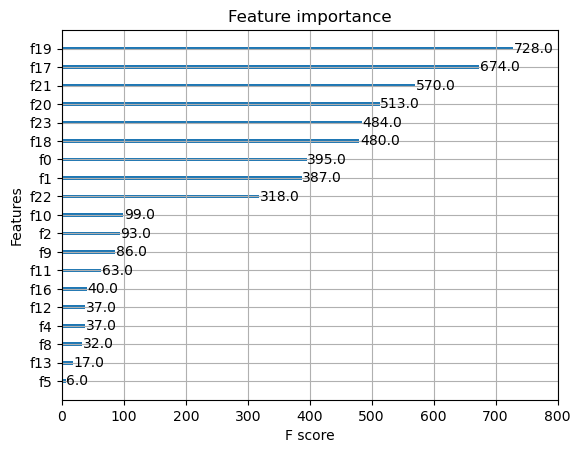

In [81]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model)
plt.savefig(save_images_to + 'test Feature importance', dpi=300)

plt.show()

In [82]:
import itertools

([<matplotlib.axis.YTick at 0x1674feb30>,
 [Text(0, 0, 'f19'),
  Text(0, 1, 'f17'),
  Text(0, 2, 'f21'),
  Text(0, 3, 'f20'),
  Text(0, 4, 'f23'),
  Text(0, 5, 'f18'),
  Text(0, 6, 'f0'),
  Text(0, 7, 'f1'),
  Text(0, 8, 'f22'),
  Text(0, 9, 'f10')])

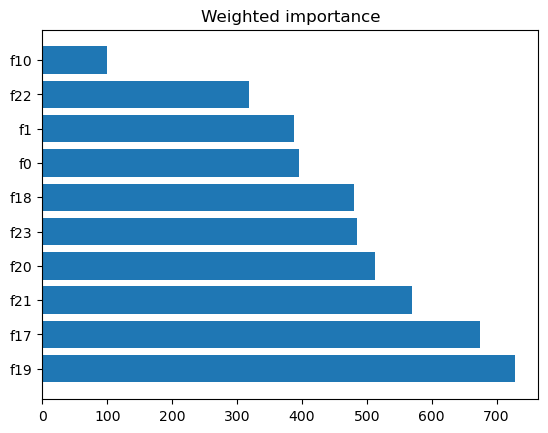

In [83]:
test_list = [0,1,2,3,4,5,6,7,8,9]
weighted = dict(sorted(model.get_booster().get_score(importance_type='weight').items(), \
                       key=lambda item: item[1], reverse=True))
x = dict(itertools.islice(weighted.items(), 0, 10))

plt.figure()
plt.title('Weighted importance')
plt.barh(test_list,x.values())
plt.yticks(test_list,x.keys())

In [84]:
feature_names = preprocessor.get_feature_names_out()
df_test = preprocessor.transform(X_CV)
df_test = pd.DataFrame(data=df_test, columns=feature_names)

In [85]:
# scaler = StandardScaler()

# scaler.fit(X_train, y_train)

# df_test = scaler.transform(X_test)
# df_test = pd.DataFrame(data=df_test)

In [86]:
# pd.isna(preprocessor.transform(X_test))

In [87]:
# feature_names = preprocessor.get_feature_names_out()
# df_test = preprocessor.transform(X_test)
# df_test = pd.DataFrame(data=df_test, columns=feature_names)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


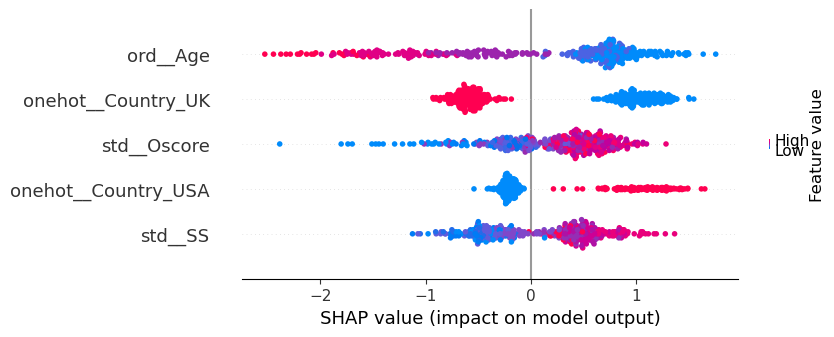

In [88]:
import shap

# feature_names = preprocessor.get_feature_names_out()
# df_test = preprocessor.transform(X_test)
# df_test = pd.DataFrame(data=df_test, columns=feature_names)

shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_test)
shap.summary_plot(shap_values, df_test, max_display=5)


In [89]:
# shap.summary_plot(shap_values, df_test)
# ax = plt.gca()

# # You can change the min and max value of xaxis by changing the arguments of:
# ax.set_xlim(-0.5, 0.5) 
# plt.show()

In [90]:
# plt.figure(figsize=(10,10),dpi = 300)

# #ax = sns.heatmap(pea, annot=True, cmap="YlGnBu")

# with plt.style.context({'axes.labelsize':12,
#                         'xtick.labelsize':12,
#                         'ytick.labelsize':12}):
#     ax = sns.heatmap(pea, annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={'size':8})
    
# plt.savefig(save_images_to + 'Cannabis feature importance heatmap', dpi=300)
# # plt.close()

In [91]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            '        Ridge Classifier': RidgeClassifier(),
            'Random Forest Classifier': RandomForestClassifier()}

In [92]:
for name, model in models.items():
    model.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [93]:
feature_name = preprocessor.get_feature_names_out()

print (feature_name)
print (len(feature_name), '\n')

features_test = np.array(feature_name)

print (features_test)
print (len(features_test))

['ord__Age' 'ord__Education' 'onehot__Gender_0' 'onehot__Gender_1'
 'onehot__Country_Australia' 'onehot__Country_Canada'
 'onehot__Country_Ireland' 'onehot__Country_New_Zealand'
 'onehot__Country_Other' 'onehot__Country_UK' 'onehot__Country_USA'
 'onehot__Ethnicity_0' 'onehot__Ethnicity_1' 'onehot__Ethnicity_2'
 'onehot__Ethnicity_3' 'onehot__Ethnicity_4' 'onehot__Ethnicity_5'
 'std__Nscore' 'std__Escore' 'std__Oscore' 'std__Ascore' 'std__Cscore'
 'std__Impulsive' 'std__SS']
24 

['ord__Age' 'ord__Education' 'onehot__Gender_0' 'onehot__Gender_1'
 'onehot__Country_Australia' 'onehot__Country_Canada'
 'onehot__Country_Ireland' 'onehot__Country_New_Zealand'
 'onehot__Country_Other' 'onehot__Country_UK' 'onehot__Country_USA'
 'onehot__Ethnicity_0' 'onehot__Ethnicity_1' 'onehot__Ethnicity_2'
 'onehot__Ethnicity_3' 'onehot__Ethnicity_4' 'onehot__Ethnicity_5'
 'std__Nscore' 'std__Escore' 'std__Oscore' 'std__Ascore' 'std__Cscore'
 'std__Impulsive' 'std__SS']
24


In [94]:
pea = df.corr(method = 'pearson')
#print (pea)

df.corr(method = 'pearson')
# plt.close()

Age    Gender  Education  Ethnicity    Nscore    Escore  \
Age        1.000000  0.096275   0.102747  -0.055311 -0.139885 -0.034771   
Gender     0.096275  1.000000   0.187890   0.005258  0.074501  0.058191   
Education  0.102747  0.187890   1.000000   0.039677 -0.092450  0.112503   
Ethnicity -0.055311  0.005258   0.039677   1.000000 -0.012430  0.037053   
Nscore    -0.139885  0.074501  -0.092450  -0.012430  1.000000 -0.431004   
Escore    -0.034771  0.058191   0.112503   0.037053 -0.431004  1.000000   
Oscore    -0.220320 -0.130757   0.072641  -0.004811  0.010275  0.245142   
Ascore     0.063193  0.220339   0.083957   0.001094 -0.216865  0.157103   
Cscore     0.177407  0.183883   0.222961   0.040322 -0.391098  0.308049   
Impulsive -0.186474 -0.167414  -0.115030   0.020470  0.174445  0.114091   
SS        -0.327406 -0.243789  -0.111439   0.008309  0.080225  0.209858   
Amphet    -0.235731 -0.212047  -0.129231  -0.006863  0.128720 -0.042609   
Benzos    -0.123303 -0.127796  -0.124517   0.013670  0.273173 -0.109804   
Cannabis  -0.429384 -0.297734  -0.243749  -0.023772  0.087739 -0.009804   
Coke      -0.224666 -0.173225  -0.100303   0.006378  0.137817  0.033253   
Crack     -0.054048 -0.151500  -0.143213   0.018439  0.110117 -0.051234   
Ecstasy   -0.372684 -0.218700  -0.133061  -0.028544  0.066167  0.082713   
Heroin    -0.121410 -0.134888  -0.121010   0.005999  0.172059 -0.081195   
LSD       -0.313258 -0.276590  -0.156155  -0.003321  0.035343  0.023411   
Meth      -0.181857 -0.175766  -0.153943  -0.016821  0.182376 -0.124762   
Mushrooms -0.320231 -0.265516  -0.141454  -0.017365  0.040331  0.025858   
Nicotine  -0.237835 -0.189072  -0.229827  -0.028899  0.126483 -0.017259   

             Oscore    Ascore    Cscore  Impulsive  ...    Benzos  Cannabis  \
Age       -0.220320  0.063193  0.177407  -0.186474  ... -0.123303 -0.429384   
Gender    -0.130757  0.220339  0.183883  -0.167414  ... -0.127796 -0.297734   
Education  0.072641  0.083957  0.222961  -0.115030  ... -0.124517 -0.243749   
Ethnicity -0.004811  0.001094  0.040322   0.020470  ...  0.013670 -0.023772   
Nscore     0.010275 -0.216865 -0.391098   0.174445  ...  0.273173  0.087739   
Escore     0.245142  0.157103  0.308049   0.114091  ... -0.109804 -0.009804   
Oscore     1.000000  0.038242 -0.056818   0.277468  ...  0.190320  0.409282   
Ascore     0.038242  1.000000  0.247534  -0.229860  ... -0.162263 -0.141468   
Cscore    -0.056818  0.247534  1.000000  -0.335139  ... -0.202030 -0.264033   
Impulsive  0.277468 -0.229860 -0.335139   1.000000  ...  0.218043  0.301308   
SS         0.421535 -0.208787 -0.229133   0.623223  ...  0.238520  0.445656   
Amphet     0.210527 -0.146199 -0.230258   0.282812  ...  0.485467  0.428158   
Benzos     0.190320 -0.162263 -0.202030   0.218043  ...  1.000000  0.339003   
Cannabis   0.409282 -0.141468 -0.264033   0.301308  ...  0.339003  1.000000   
Coke       0.179779 -0.198875 -0.190128   0.254268  ...  0.422722  0.426438   
Crack      0.091322 -0.105962 -0.131449   0.182519  ...  0.334759  0.225867   
Ecstasy    0.293065 -0.111195 -0.210623   0.257962  ...  0.320682  0.530452   
Heroin     0.128167 -0.169606 -0.156378   0.192818  ...  0.411714  0.223135   
LSD        0.362204 -0.087962 -0.156975   0.219255  ...  0.276873  0.499725   
Meth       0.160828 -0.154019 -0.185747   0.174896  ...  0.510835  0.276451   
Mushrooms  0.364845 -0.106520 -0.185881   0.259996  ...  0.328594  0.561106   
Nicotine   0.187898 -0.107157 -0.227984   0.242679  ...  0.293205  0.494007   

               Coke     Crack   Ecstasy    Heroin       LSD      Meth  \
Age       -0.224666 -0.054048 -0.372684 -0.121410 -0.313258 -0.181857   
Gender    -0.173225 -0.151500 -0.218700 -0.134888 -0.276590 -0.175766   
Education -0.100303 -0.143213 -0.133061 -0.121010 -0.156155 -0.153943   
Ethnicity  0.006378  0.018439 -0.028544  0.005999 -0.003321 -0.016821   
Nscore     0.137817  0.110117  0.066167  0.172059  0.035343  0.182376   
Escore     0.033253 -0.051234  0.0

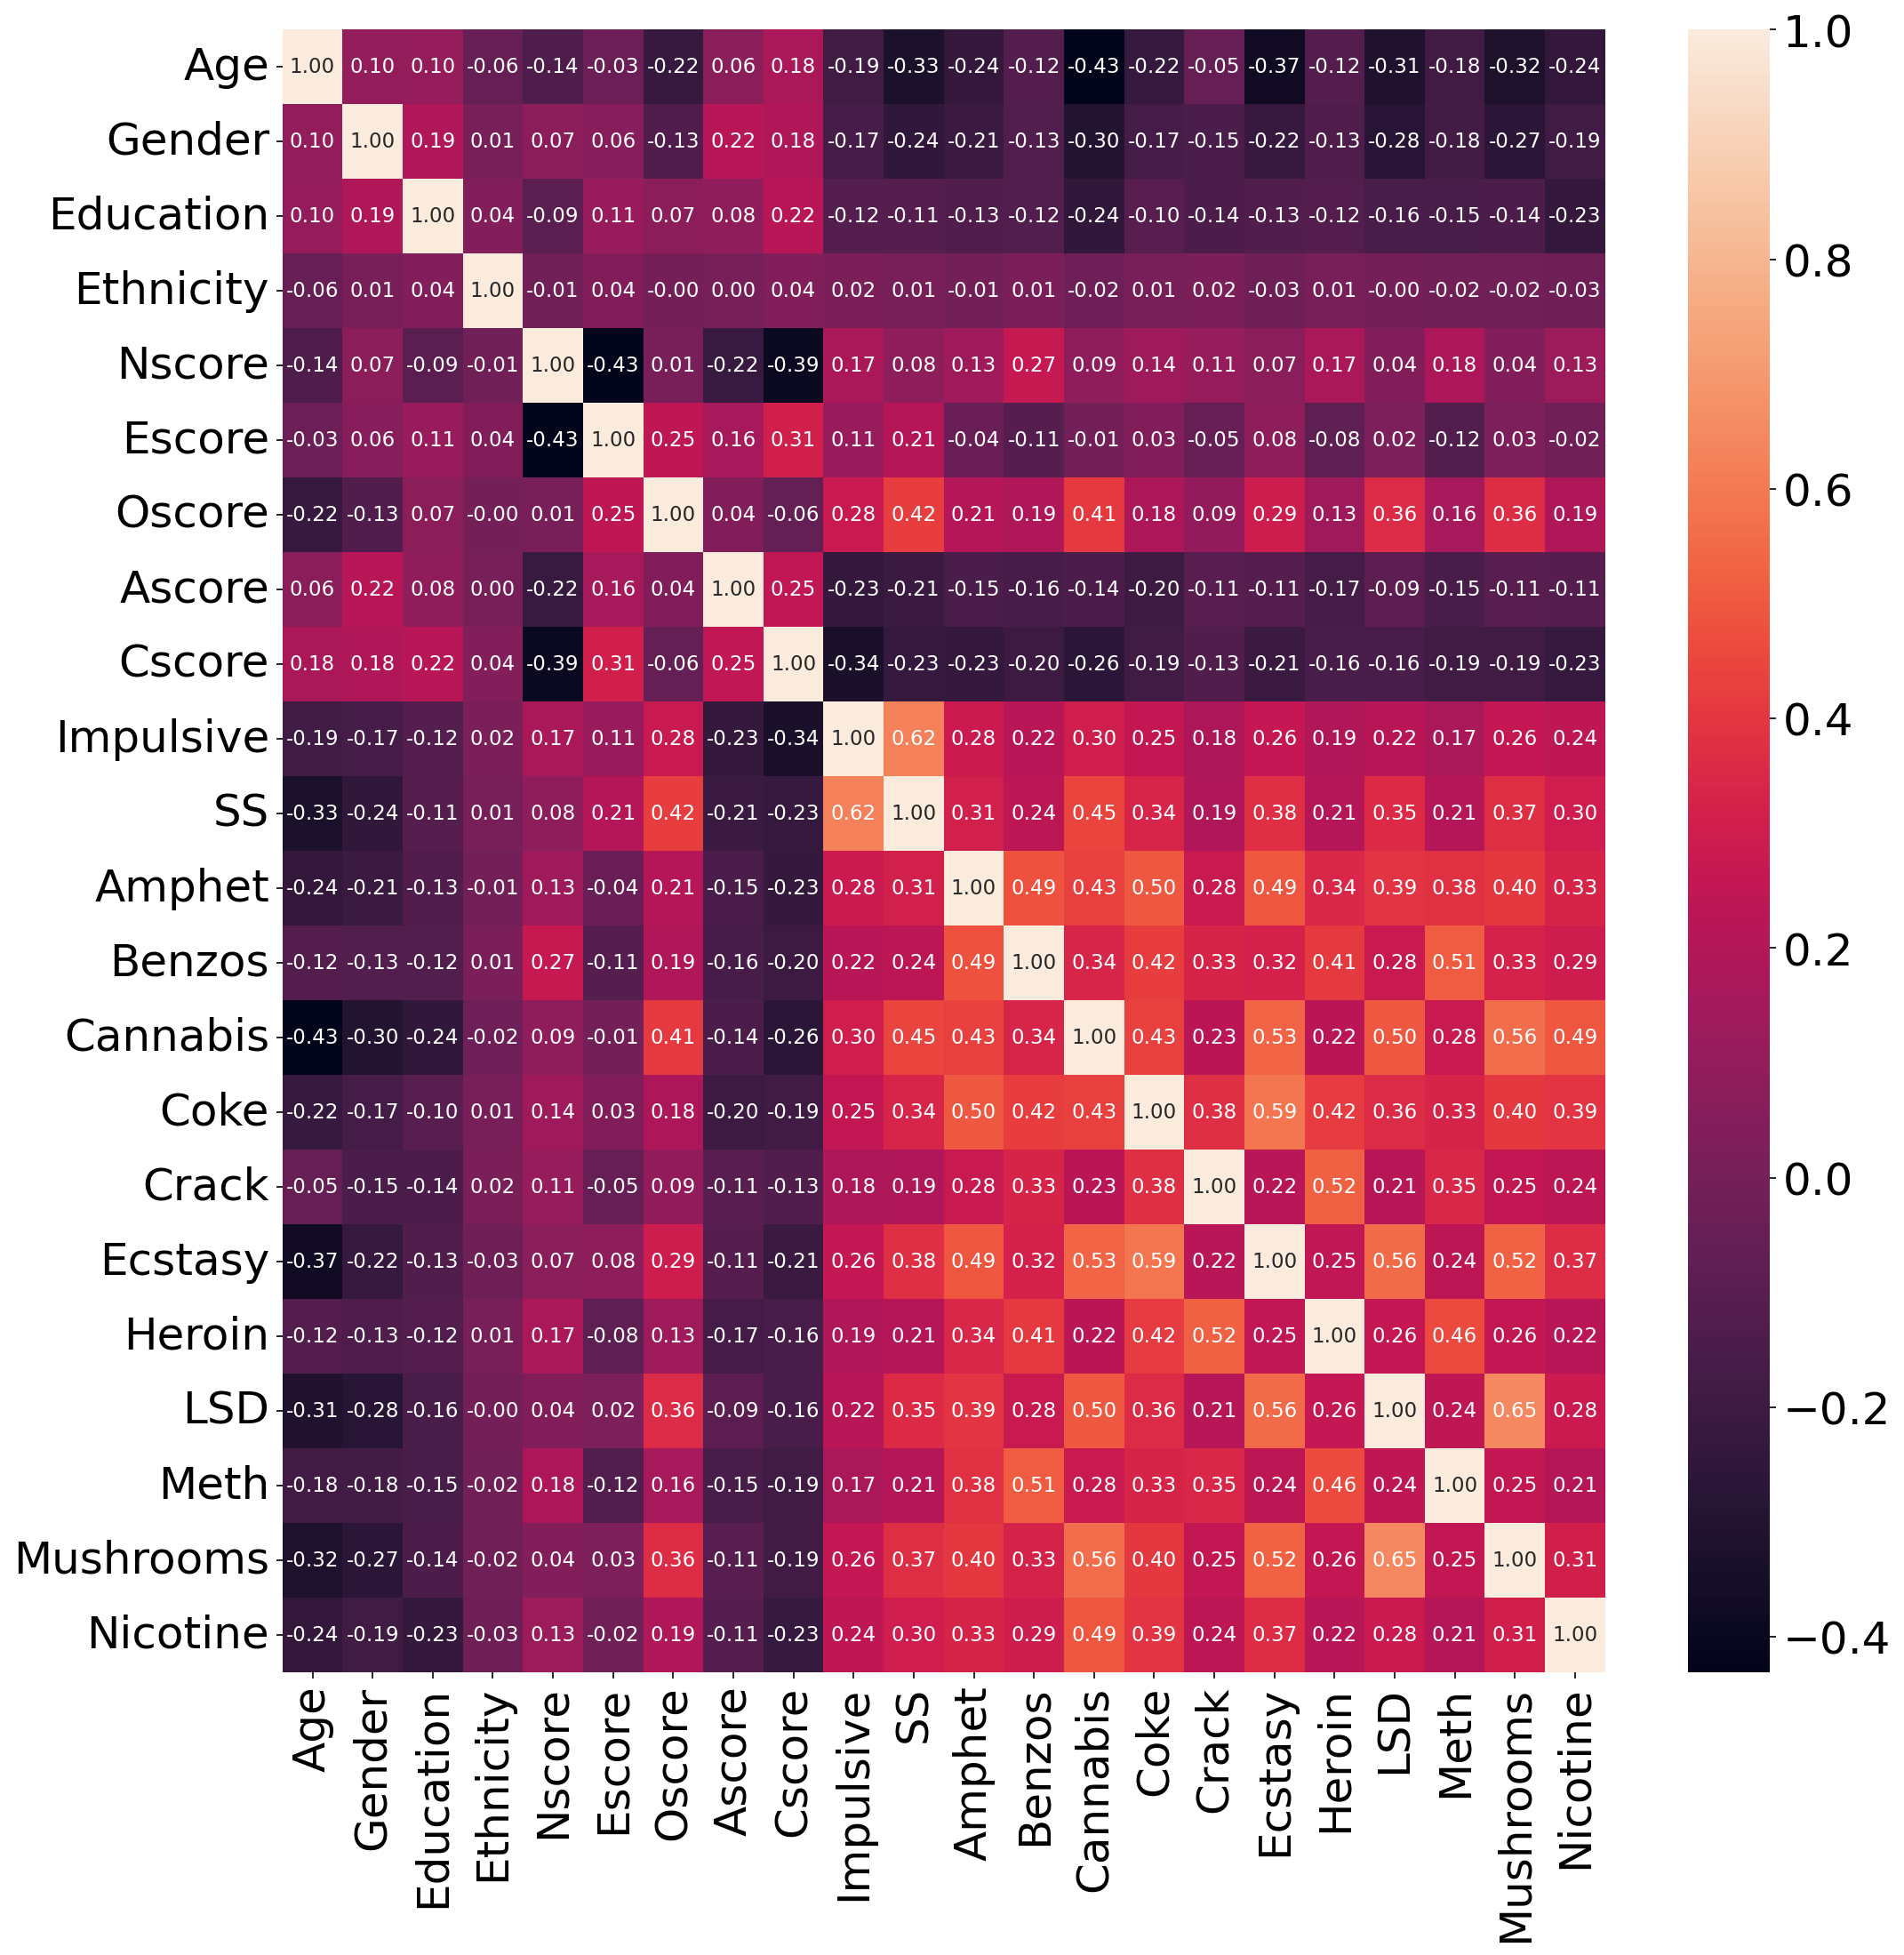

In [95]:
plt.figure(figsize=(16,16), dpi = 150)

#ax = sns.heatmap(pea, annot=True, annot_kws={'size':8})

#ax.set_xticklabels(fontsize = 16)
#    ax = sns.heatmap(uniform_data, annot=True, fmt='.1f', annot_kws={'size':6})
with plt.style.context({'axes.labelsize':24,
                        'xtick.labelsize':24,
                        'ytick.labelsize':24}):
    ax = sns.heatmap(pea, annot=True, fmt='.2f', annot_kws={'size':11})
    
plt.savefig(save_images_to + 'All drug heatmap', dpi=300)
# plt.close()

In [96]:
df['Amphet'] = df['Amphet'].astype(int).astype(str)
df['Benzos'] = df['Benzos'].astype(int).astype(str)
df['Coke'] = df['Coke'].astype(int).astype(str)
df['Crack'] = df['Crack'].astype(int).astype(str)
df['Ecstasy'] = df['Ecstasy'].astype(int).astype(str)
df['Heroin'] = df['Heroin'].astype(int).astype(str)
df['LSD'] = df['LSD'].astype(int).astype(str)
df['Meth'] = df['Meth'].astype(int).astype(str)
df['Mushrooms'] = df['Mushrooms'].astype(int).astype(str)

In [97]:
pea = df.corr(method = 'pearson')
#print (pea)

df.corr(method = 'pearson')
# plt.close()

Age    Gender  Education  Ethnicity    Nscore    Escore  \
Age        1.000000  0.096275   0.102747  -0.055311 -0.139885 -0.034771   
Gender     0.096275  1.000000   0.187890   0.005258  0.074501  0.058191   
Education  0.102747  0.187890   1.000000   0.039677 -0.092450  0.112503   
Ethnicity -0.055311  0.005258   0.039677   1.000000 -0.012430  0.037053   
Nscore    -0.139885  0.074501  -0.092450  -0.012430  1.000000 -0.431004   
Escore    -0.034771  0.058191   0.112503   0.037053 -0.431004  1.000000   
Oscore    -0.220320 -0.130757   0.072641  -0.004811  0.010275  0.245142   
Ascore     0.063193  0.220339   0.083957   0.001094 -0.216865  0.157103   
Cscore     0.177407  0.183883   0.222961   0.040322 -0.391098  0.308049   
Impulsive -0.186474 -0.167414  -0.115030   0.020470  0.174445  0.114091   
SS        -0.327406 -0.243789  -0.111439   0.008309  0.080225  0.209858   
Cannabis  -0.429384 -0.297734  -0.243749  -0.023772  0.087739 -0.009804   
Nicotine  -0.237835 -0.189072  -0.229827  -0.028899  0.126483 -0.017259   

             Oscore    Ascore    Cscore  Impulsive        SS  Cannabis  \
Age       -0.220320  0.063193  0.177407  -0.186474 -0.327406 -0.429384   
Gender    -0.130757  0.220339  0.183883  -0.167414 -0.243789 -0.297734   
Education  0.072641  0.083957  0.222961  -0.115030 -0.111439 -0.243749   
Ethnicity -0.004811  0.001094  0.040322   0.020470  0.008309 -0.023772   
Nscore     0.010275 -0.216865 -0.391098   0.174445  0.080225  0.087739   
Escore     0.245142  0.157103  0.308049   0.114091  0.209858 -0.009804   
Oscore     1.000000  0.038242 -0.056818   0.277468  0.421535  0.409282   
Ascore     0.038242  1.000000  0.247534  -0.229860 -0.208787 -0.141468   
Cscore    -0.056818  0.247534  1.000000  -0.335139 -0.229133 -0.264033   
Impulsive  0.277468 -0.229860 -0.335139   1.000000  0.623223  0.301308   
SS         0.421535 -0.208787 -0.229133   0.623223  1.000000  0.445656   
Cannabis   0.409282 -0.141468 -0.264033   0.301308  0.445656  1.000000   
Nicotine   0.187898 -0.107157 -0.227984   0.242679  0.297442  0.494007   

           Nicotine  
Age       -0.237835  
Gender    -0.189072  
Education -0.229827  
Ethnicity -0.028899  
Nscore     0.126483  
Escore    -0.017259  
Oscore     0.187898  
Ascore    -0.107157  
Cscore    -0.227984  
Impulsive  0.242679  
SS         0.297442  
Cannabis   0.494007  
Nicotine   1.000000

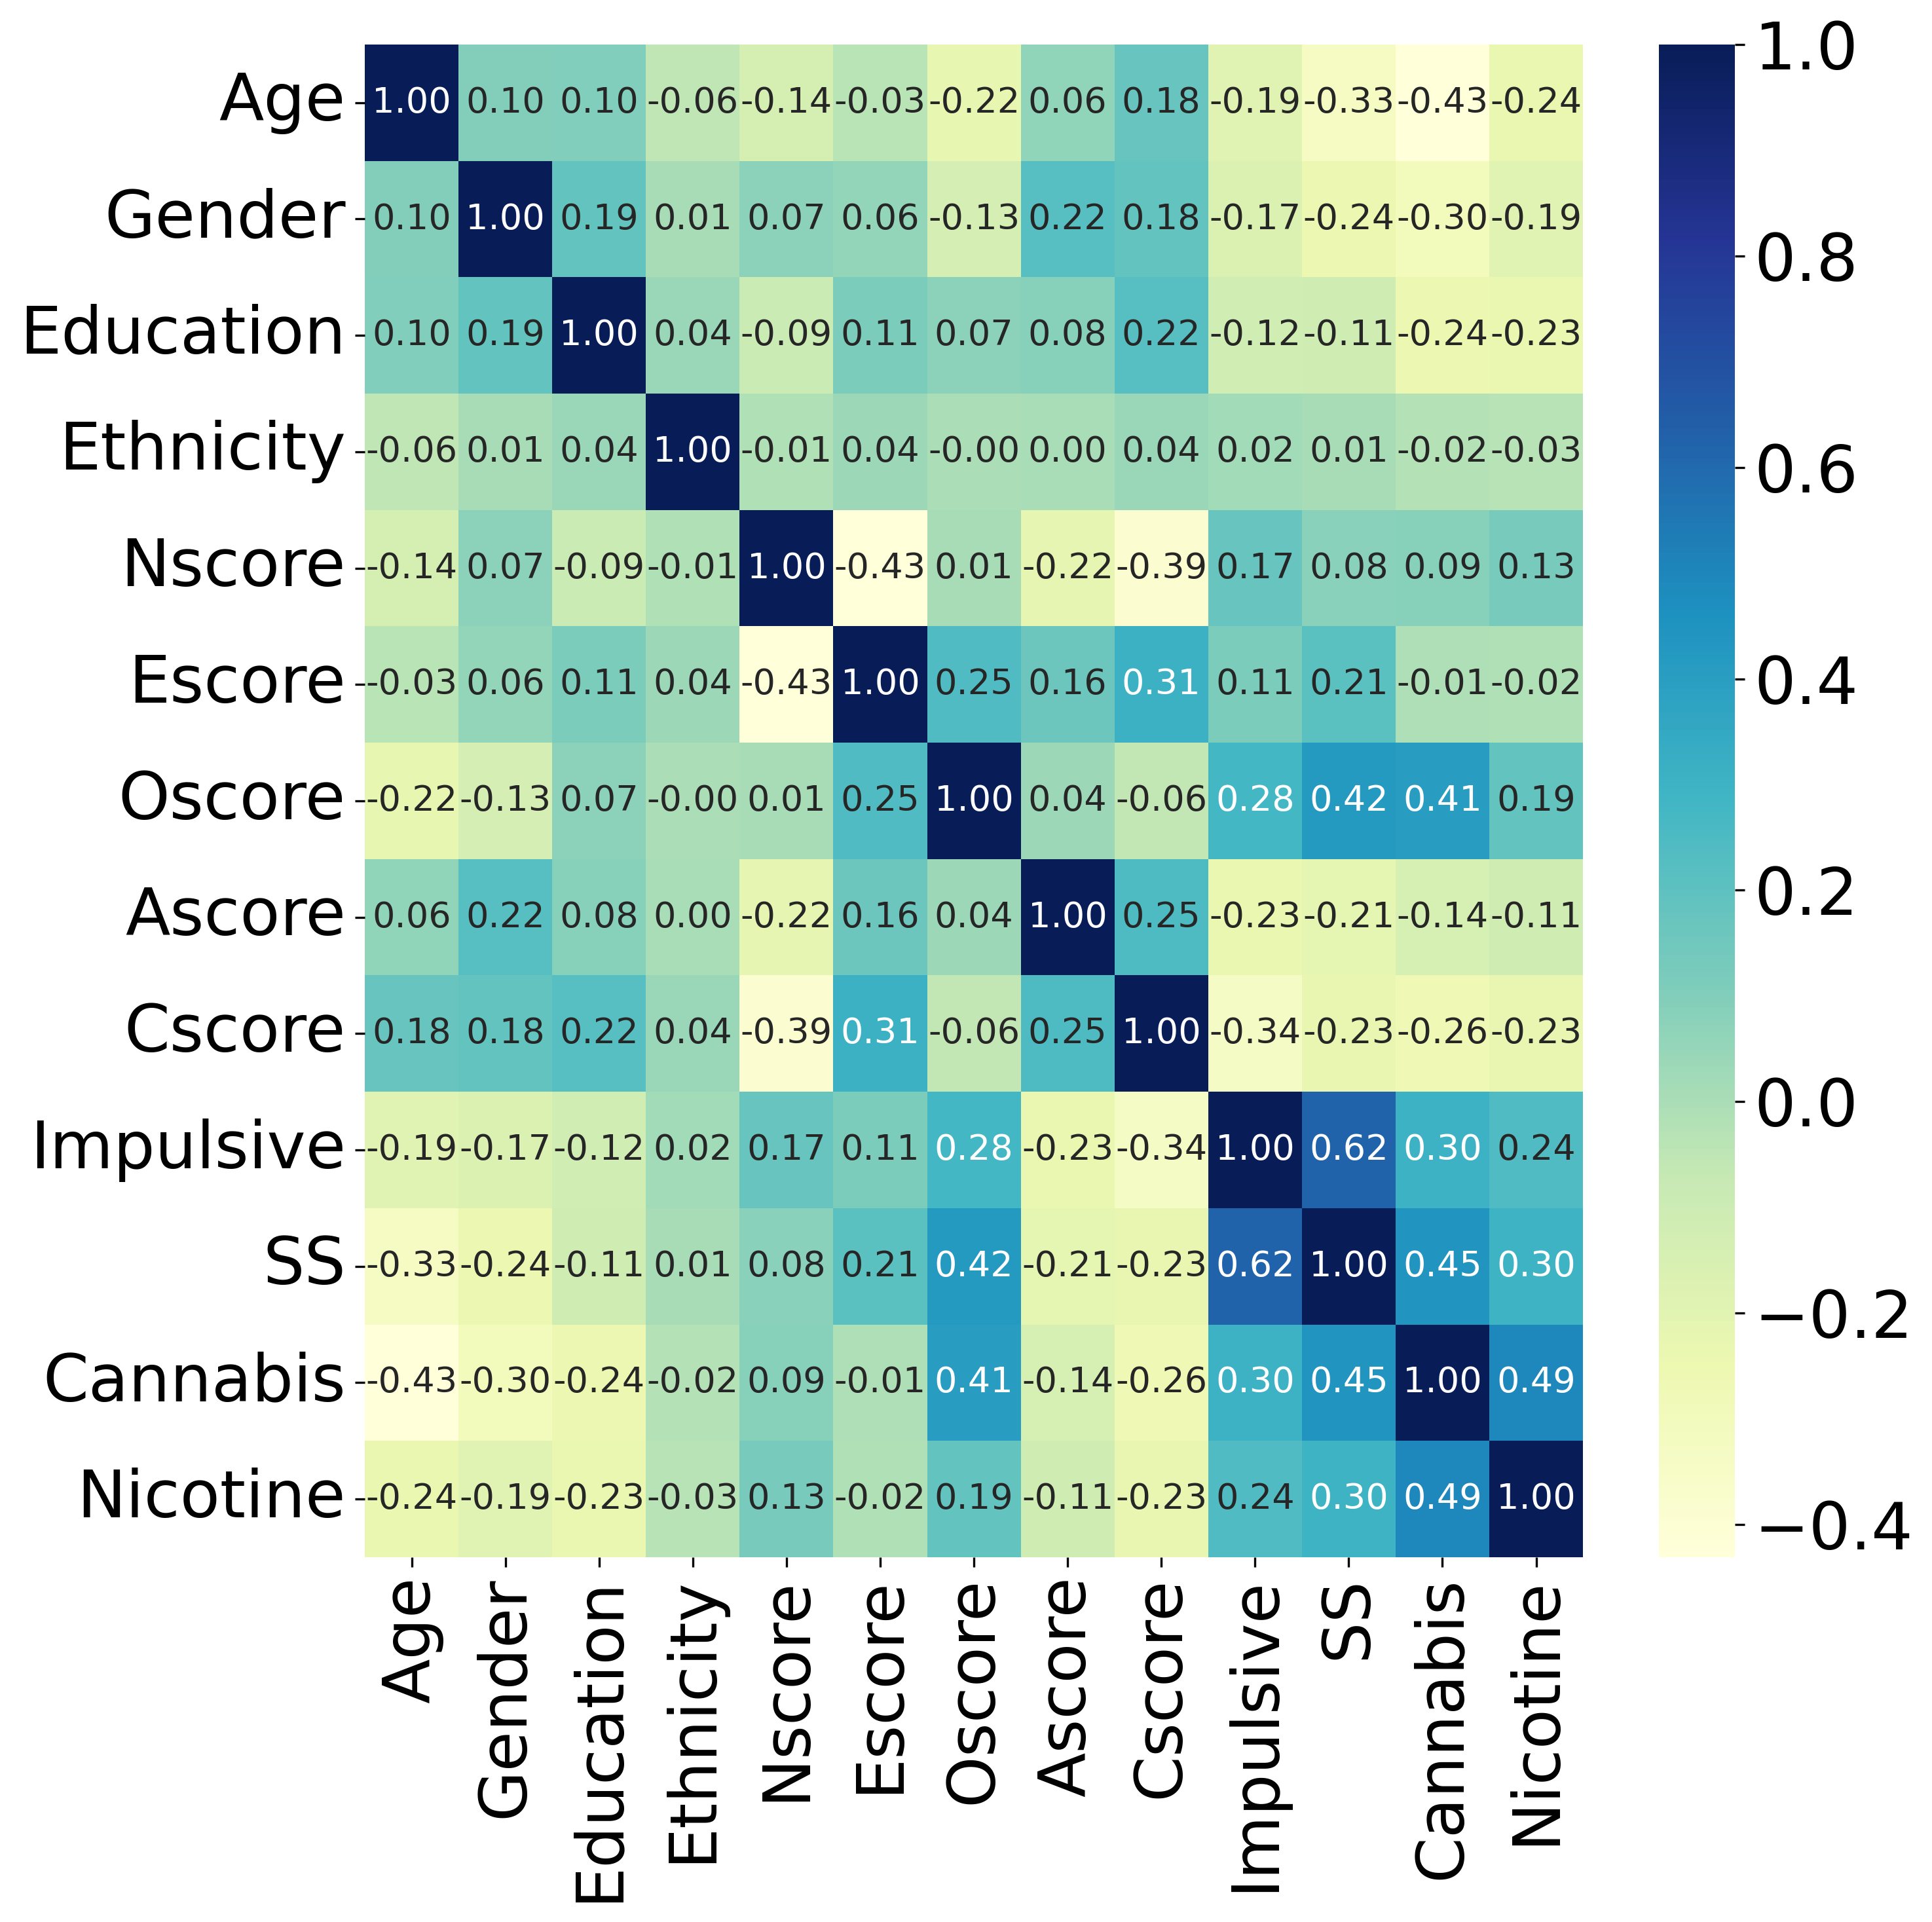

In [98]:
plt.figure(figsize=(10,10),dpi = 300)

#ax = sns.heatmap(pea, annot=True, cmap="YlGnBu")

with plt.style.context({'axes.labelsize':24,
                        'xtick.labelsize':24,
                        'ytick.labelsize':24}):
    ax = sns.heatmap(pea, annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={'size':13})
    
plt.savefig(save_images_to + 'Cannabis heatmap', dpi=300)
# plt.close()

In [99]:
#df = pd.read_csv('Drug_Consumption.csv')
#df = df.drop(['ID', 'Alcohol', 'Amyl','Caff','Choc','Ketamine','Legalh','Nicotine','VSA'], axis=1)

In [100]:
# print (df.head())

In [101]:
# df = pd.read_csv('Drug_Consumption.csv')
# df = df.drop(['ID', 'Alcohol', 'Amyl','Caff','Choc','Ketamine','Legalh','Nicotine','VSA'], axis=1)

In [102]:
# print (y_train.shape)

In [103]:
# f_test, p_value = f_classif(X_train_prep,y_train)
# #print (f_test)

# mi = mutual_info_classif(X_train_prep,y_train)

# print ("f_classif \n",f_test, "\n")
# #print ("f_classif \n",f_test_class, "\n")
# print ("mutual_info_classif \n",mi, "\n")
# #print ("mutual_info_classif \n",d, "\n")

# #plt.bar(X,y)

In [104]:
# f_test_sort = np.sort(f_test)
# rev_f_test = f_test_sort[::-1]

In [105]:
# print (rev_f_test[:5])

In [106]:
# print (features_test)
# print (mi)

In [107]:
# ####################################################################
# # 이상하게 preprocessing 할때, 오디널 인코더에 교육을 넣으면 이렇게되네? 나중에 교육을 다른데로 빼던가 ㄱㄱ
# # 화요일에 돌림. 이상하게 이번에는 다 잘맞게 나옴.
# ######################################################################

# indices = np.argsort(mi)[::-1][:5]
# #print (mi)
# #print (mi[indices])
# features_test = np.array(feature_name)

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.barh(features_test[indices],mi[indices])#, tick_label = ['Country, United Kingdom','SS', 'Country United States','Age 18-24','Oscore'])
# ax.set_xlabel('mutual information')

# plt.savefig(save_images_to + 'top5 mutual info value', dpi=300)


## Predict Cannabis usage, confusion matrix

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [109]:
print (len(y_other))
print (len(y_train))
print (len(y_val))
print (len(y_test))

1507
1130
376
377


In [110]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, fbeta_score

In [111]:
alpha = np.logspace(-2,2,21)
train_acc = np.zeros(len(alpha))
valid_acc = np.zeros(len(alpha))
f_half = np.zeros(len(y_test))

In [112]:
# for i in range(len(y_test))

In [113]:
# for i in range(len(alpha)):
#     logreg = LogisticRegression(penalty='l2')
#     logreg.fit(X_train,y_train)
    
#     train_acc[i] = accuracy_score(y_train, logreg.predict(X_train))
#     valid_acc[i] = accuracy_score(y_test, logreg.predict(X_test))

In [114]:
# print(np.max(valid_acc))

In [115]:
# model = LogisticRegression(penalty='l1')
# #model = RidgeClassifier()
# model.fit(X_train, y_train)
# yhat = model.predict(X_test)
# print (accuracy_score(y_test,yhat))
# # print (accuracy_score(y_val,yhat))
# print (fbeta_score(y_test,yhat, beta=0.5, average = 'weighted'))

In [116]:
# model = LogisticRegression()
# #model = RidgeClassifier()
# model.fit(X_train, y_train)
# yhat_no = model.predict(X_test)

In [117]:
# print (accuracy_score(y_test,yhat_no))
# # print (accuracy_score(y_val,yhat))
# print (fbeta_score(y_test,yhat_no, beta=0.5, average = 'weighted'))

In [118]:
model = LogisticRegression(penalty='l2')
#model = RidgeClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [119]:
print (accuracy_score(y_test,yhat))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat, beta=0.5, average = 'weighted'))

0.8196286472148541
0.8170449568011383


In [120]:
model = LogisticRegression(penalty='none')
#model = RidgeClassifier()
model.fit(X_train, y_train)
yhat_no = model.predict(X_test)
print (accuracy_score(y_test,yhat_no))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_no, beta=0.5, average = 'weighted'))

0.8249336870026526
0.8224414023703205


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


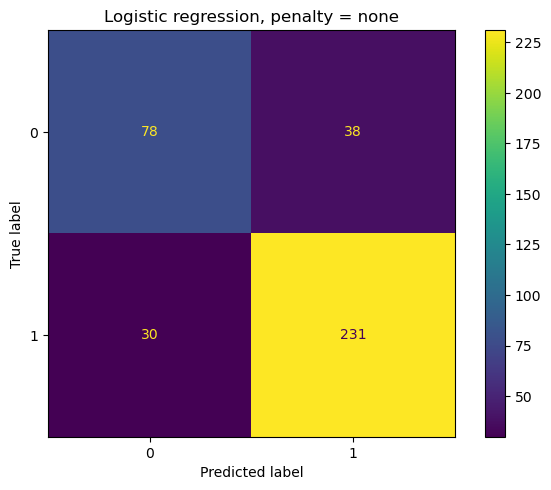

In [121]:
cm = confusion_matrix(y_test,yhat)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.title('Logistic regression, penalty = none')
plt.savefig(save_images_to + 'Logistic regression CM', dpi=300)

plt.show()

In [122]:
#print (y_val)
#model = LogisticRegression()
model = RandomForestClassifier(max_depth=1)
model.fit(X_train, y_train)
yhat_3 = model.predict(X_test)

print (accuracy_score(y_test,yhat_3))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_3, beta=0.5, average = 'weighted'))

0.6923076923076923
0.510718789407314


In [123]:
#print (y_val)
#model = LogisticRegression()
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)
yhat_real = model.predict(X_test)

print (accuracy_score(y_test,yhat_real))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_real, beta=0.5, average = 'weighted'))

0.8222811671087533
0.8194524583194145


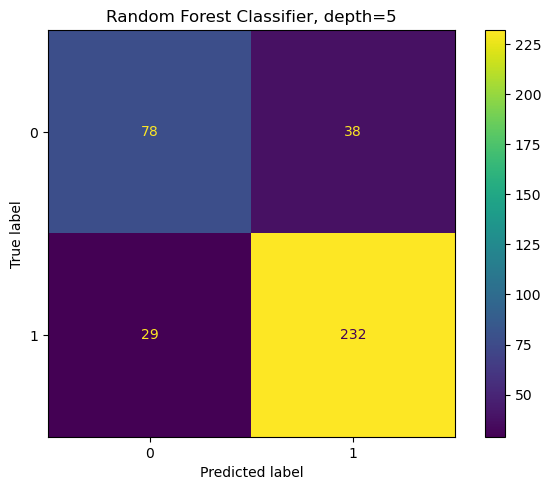

In [124]:
cm = confusion_matrix(y_test,yhat_real)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.title('Random Forest Classifier, depth=5')
plt.savefig(save_images_to + '5_Random Forest Classifier CM', dpi=300)

plt.show()

In [125]:
#print (y_val)
#model = LogisticRegression()
model = RandomForestClassifier(max_depth=4)
model.fit(X_train, y_train)
yhat_3 = model.predict(X_test)

print (accuracy_score(y_test,yhat_3))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_3, beta=0.5, average = 'weighted'))

0.8143236074270557
0.8093233203226918


In [126]:
#print (y_val)
#model = LogisticRegression()
model = RandomForestClassifier()
model.fit(X_train, y_train)
yhat_init = model.predict(X_test)

print (accuracy_score(y_test,yhat_init))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_init, beta=0.5, average = 'weighted'))

0.8275862068965517
0.8279195139671276


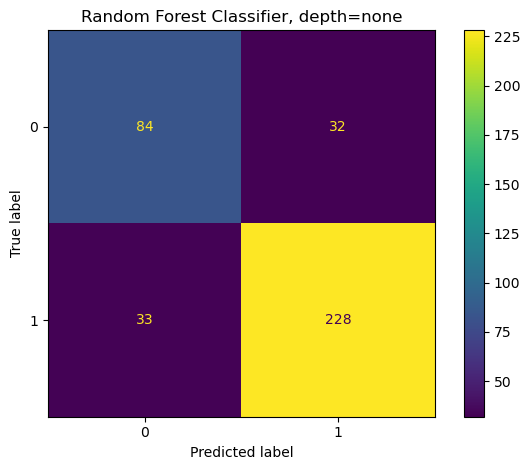

In [127]:
cm = confusion_matrix(y_test,yhat_init)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

plt.title('Random Forest Classifier, depth=none')
plt.tight_layout()
plt.savefig(save_images_to + 'Init_Random Forest Classifier CM', dpi=300)

plt.show()

In [128]:
#print (y_val)
#model = LogisticRegression()
model = RandomForestClassifier(max_depth=3)
model.fit(X_train, y_train)
yhat_4 = model.predict(X_test)

print (accuracy_score(y_test,yhat_4))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_4, beta=0.5, average = 'weighted'))

0.8037135278514589
0.7960688328607347


In [129]:
#print (y_val)
#model = LogisticRegression()
model = RandomForestClassifier(max_depth=2)
model.fit(X_train, y_train)
yhat_5 = model.predict(X_test)

print (accuracy_score(y_test,yhat_5))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_5, beta=0.5, average = 'weighted'))

0.8037135278514589
0.7909062080107269


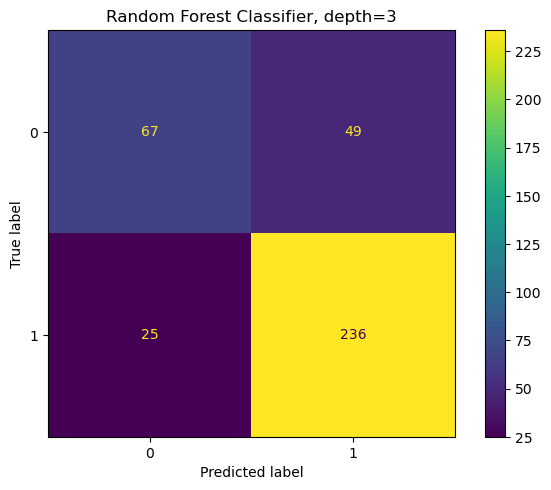

In [130]:
cm = confusion_matrix(y_test,yhat_4)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.title('Random Forest Classifier, depth=3')
plt.savefig(save_images_to + '3_Random Forest Classifier CM', dpi=300)

plt.show()

In [131]:
#print (y_val)
#model = LogisticRegression()
model = RandomForestClassifier(max_depth=1)
model.fit(X_train, y_train)
yhat_5 = model.predict(X_test)

print (accuracy_score(y_test,yhat_5))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_5, beta=0.5, average = 'weighted'))

0.6923076923076923
0.510718789407314


In [132]:
model = RidgeClassifier()
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [133]:
print (accuracy_score(y_test,yhat))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat, beta=0.5, average = 'weighted'))

0.8275862068965517
0.825423747241158


In [134]:
model = RidgeClassifier(solver='saga')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print (accuracy_score(y_test,yhat))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat, beta=0.5, average = 'weighted'))

0.8275862068965517
0.825423747241158


In [135]:
model = RidgeClassifier(solver='cholesky')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print (accuracy_score(y_test,yhat))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat, beta=0.5, average = 'weighted'))

0.8275862068965517
0.825423747241158


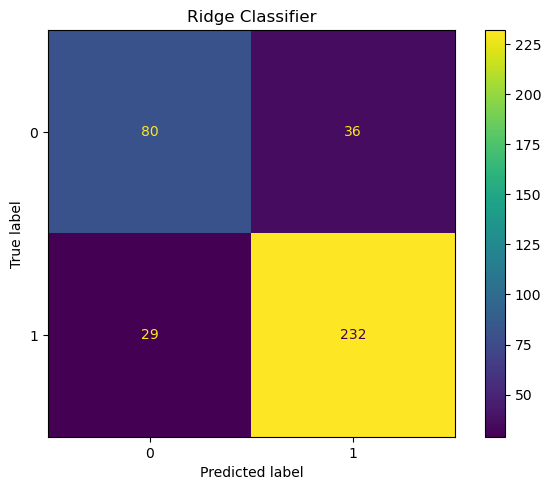

In [136]:
cm = confusion_matrix(y_test,yhat)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.title('Ridge Classifier')
plt.savefig(save_images_to + 'Ridge Classifier CM', dpi=300)

plt.show()

In [137]:
# model = Lasso()
# model.fit(X_train, y_train)
# yhat_la = model.predict(X_test)
# print (accuracy_score(y_test,yhat_la))
# # print (accuracy_score(y_val,yhat))
# print (fbeta_score(y_test,yhat_la, beta=0.5, average = 'weighted'))

In [138]:
from sklearn.svm import SVC

In [139]:
model = SVC()
model.fit(X_train, y_train)
yhat_svc = model.predict(X_test)
print (accuracy_score(y_test,yhat_svc))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_svc, beta=0.5, average = 'weighted'))

0.8169761273209549
0.8123415046491969


In [140]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
yhat_svc_auto = model.predict(X_test)
print (accuracy_score(y_test,yhat_svc_auto))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_svc_auto, beta=0.5, average = 'weighted'))

0.830238726790451
0.8258534122770452


In [141]:
model = SVC(gamma='auto', C=0.5)
model.fit(X_train, y_train)
yhat_svc = model.predict(X_test)
print (accuracy_score(y_test,yhat_svc))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_svc, beta=0.5, average = 'weighted'))

0.8196286472148541
0.814833350974143


In [142]:
model = SVC(gamma='auto', C=2)
model.fit(X_train, y_train)
yhat_svc = model.predict(X_test)
print (accuracy_score(y_test,yhat_svc))
# print (accuracy_score(y_val,yhat))
print (fbeta_score(y_test,yhat_svc, beta=0.5, average = 'weighted'))

0.8222811671087533
0.8188891035499358


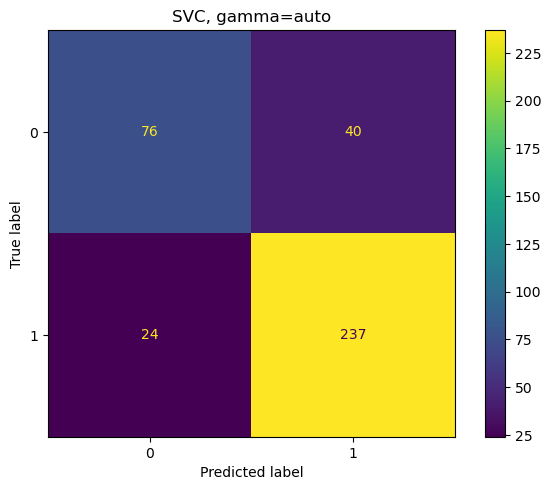

In [143]:
cm = confusion_matrix(y_test,yhat_svc_auto)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.title('SVC, gamma=auto')
plt.savefig(save_images_to + 'SVC CM', dpi=300)

plt.show()

In [144]:
from sklearn.model_selection import KFold

In [145]:
# cols = ['Amphet','Benzos','Coke','Crack','Ecstasy','Heroin','LSD','Meth','Mushrooms']
# df['combined'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

# print (df['combined'])

In [146]:
# count_matrix = df.groupby(['Country','combined']).size().unstack()

# count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1), axis=0)
# print (count_matrix_norm)

In [147]:
# count_matrix_norm.fillna('0')
# #'Amphet','Benzos','Coke','Crack','Ecstasy','Heroin','LSD','Meth','Mushrooms'

In [148]:
# plt.figure(figsize=(5,3))
# count_matrix_norm.plot(kind='bar', stacked=True)
# #count_matrix_norm.plot(kind='bar', stacked=True, legend)


# plt.show()

In [149]:
# Coulmntransformer
# OneHotEncoder